# Grupo 5 

- Chanampa Jazmin
- Dusset Maia
- Gauna Lesteyme Lucas
- Gonzalez Zago Joaquin

# Parte 1

## Ejercicio 1
1) Realice un diagrama del algoritmo de resolución de los sistemas de ecuaciones: 
-   Homogéneos  
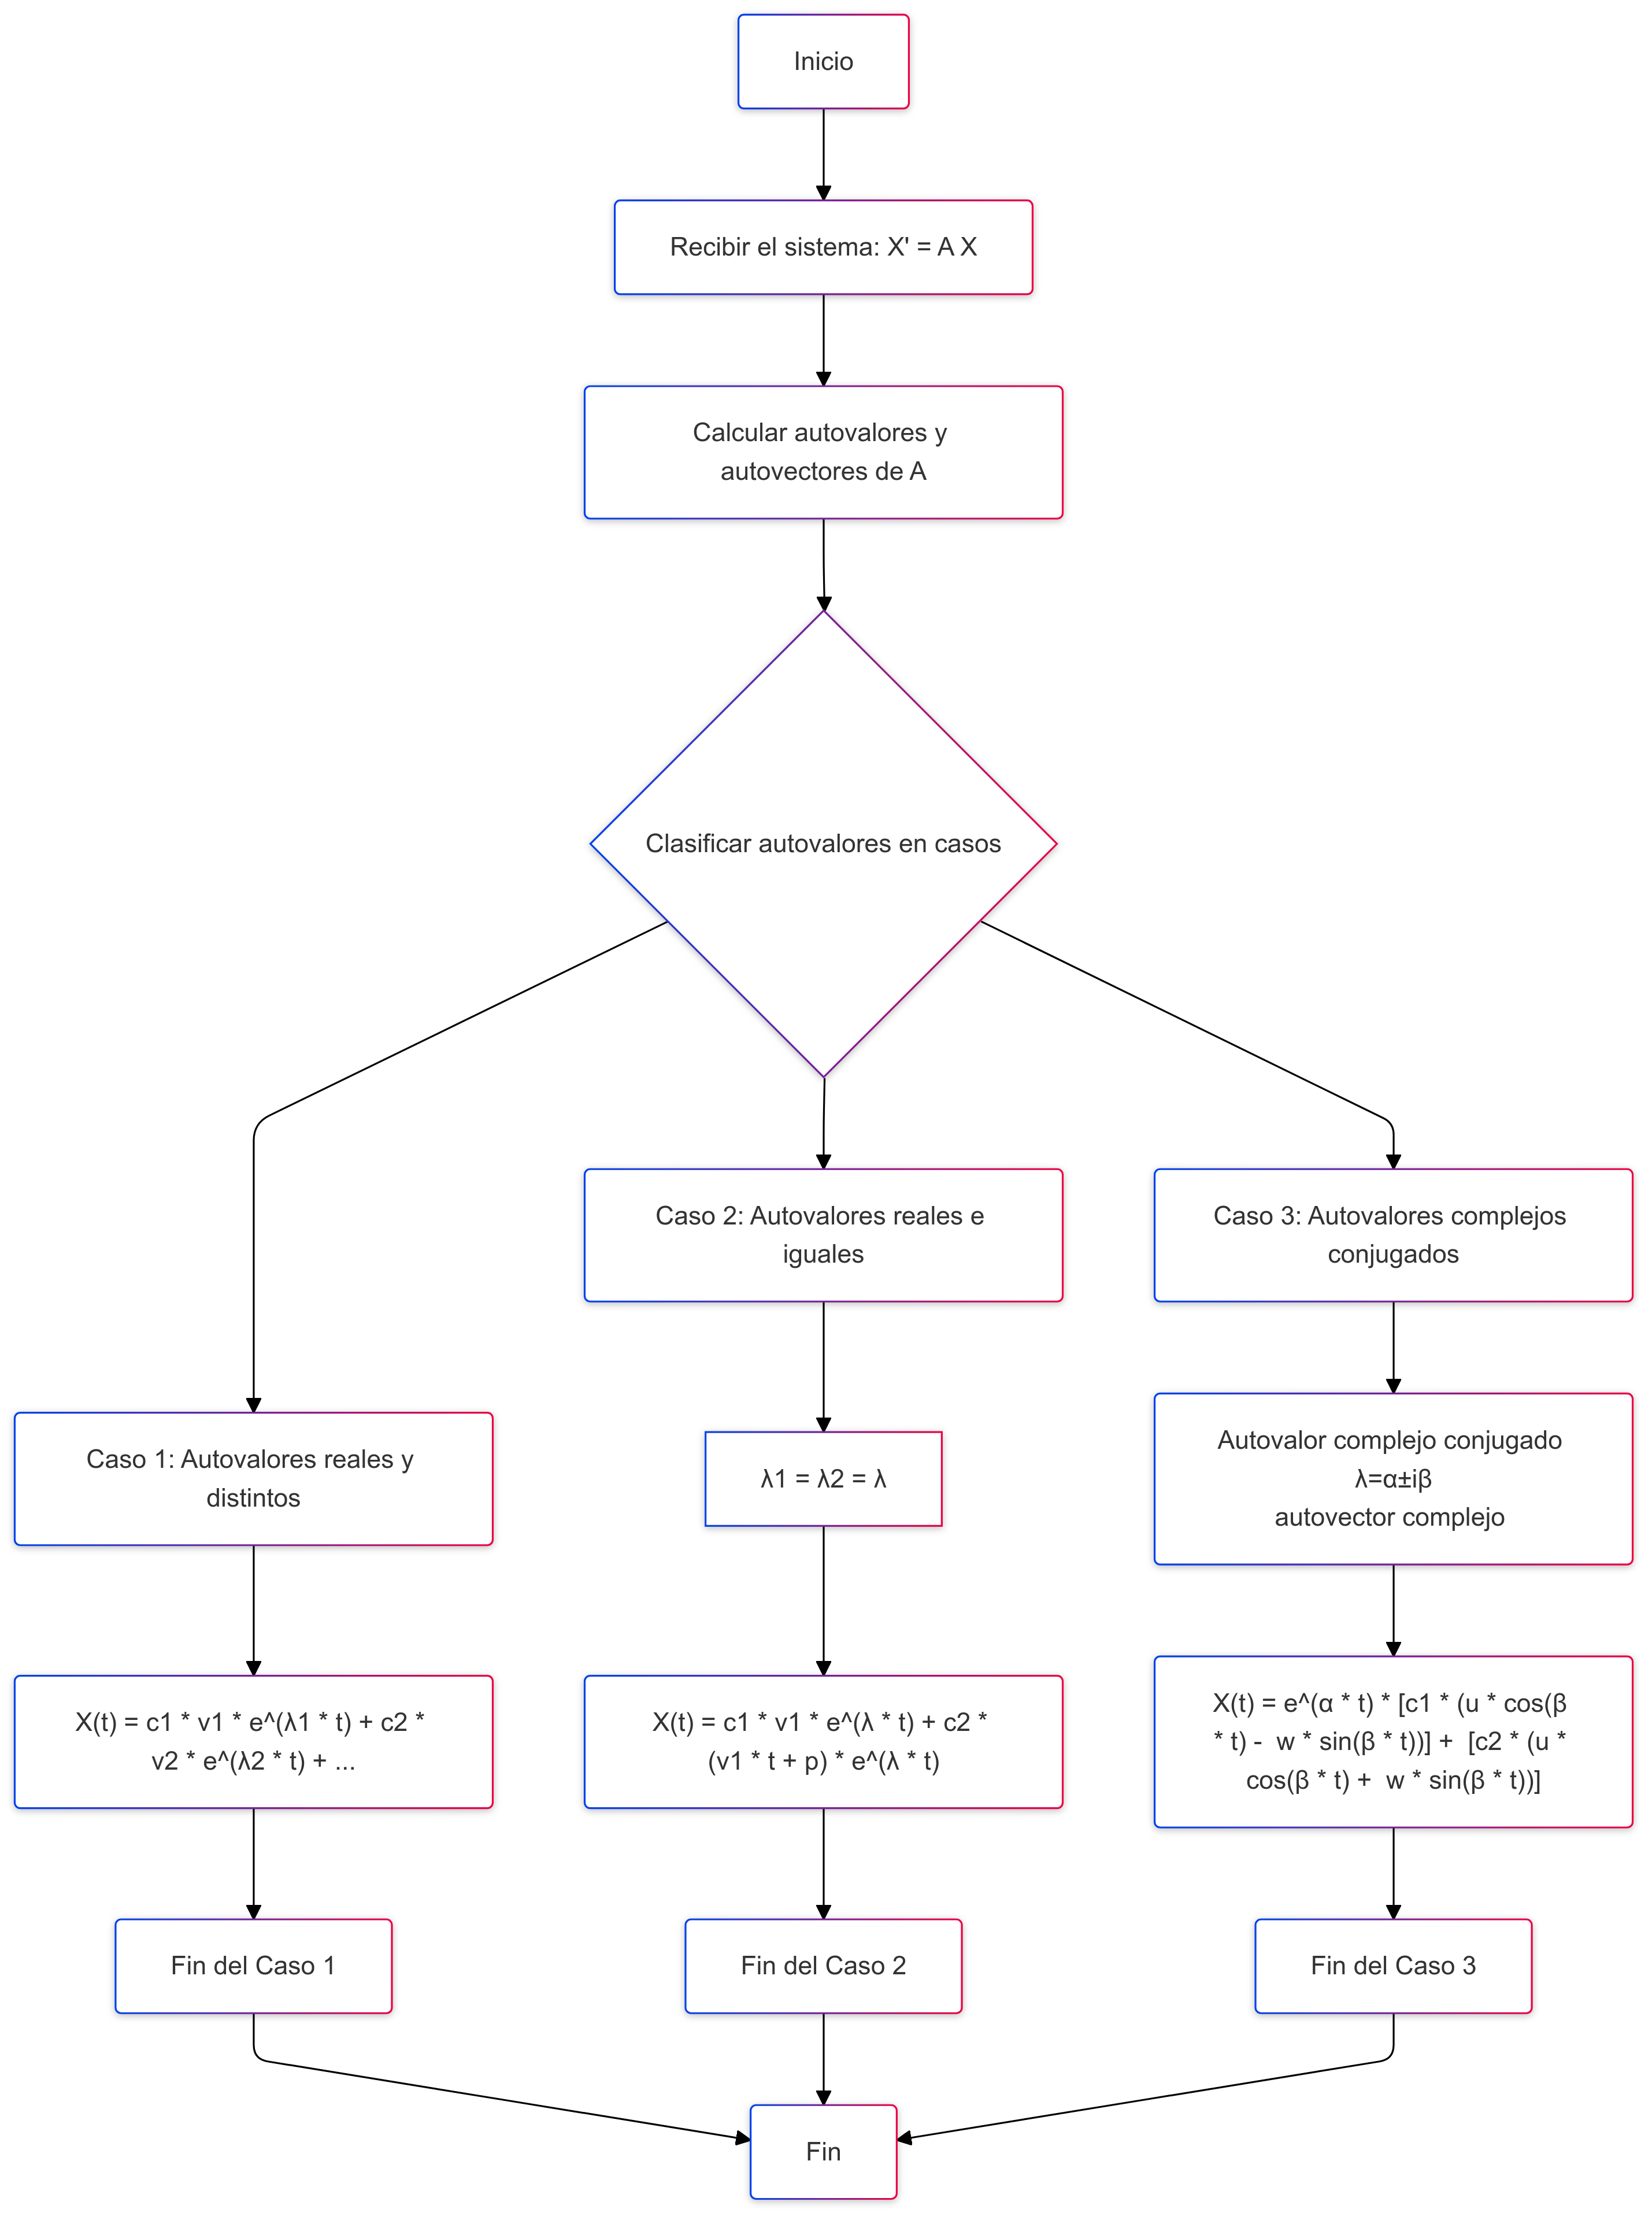

-   No Homogéneos aplicando Laplace.
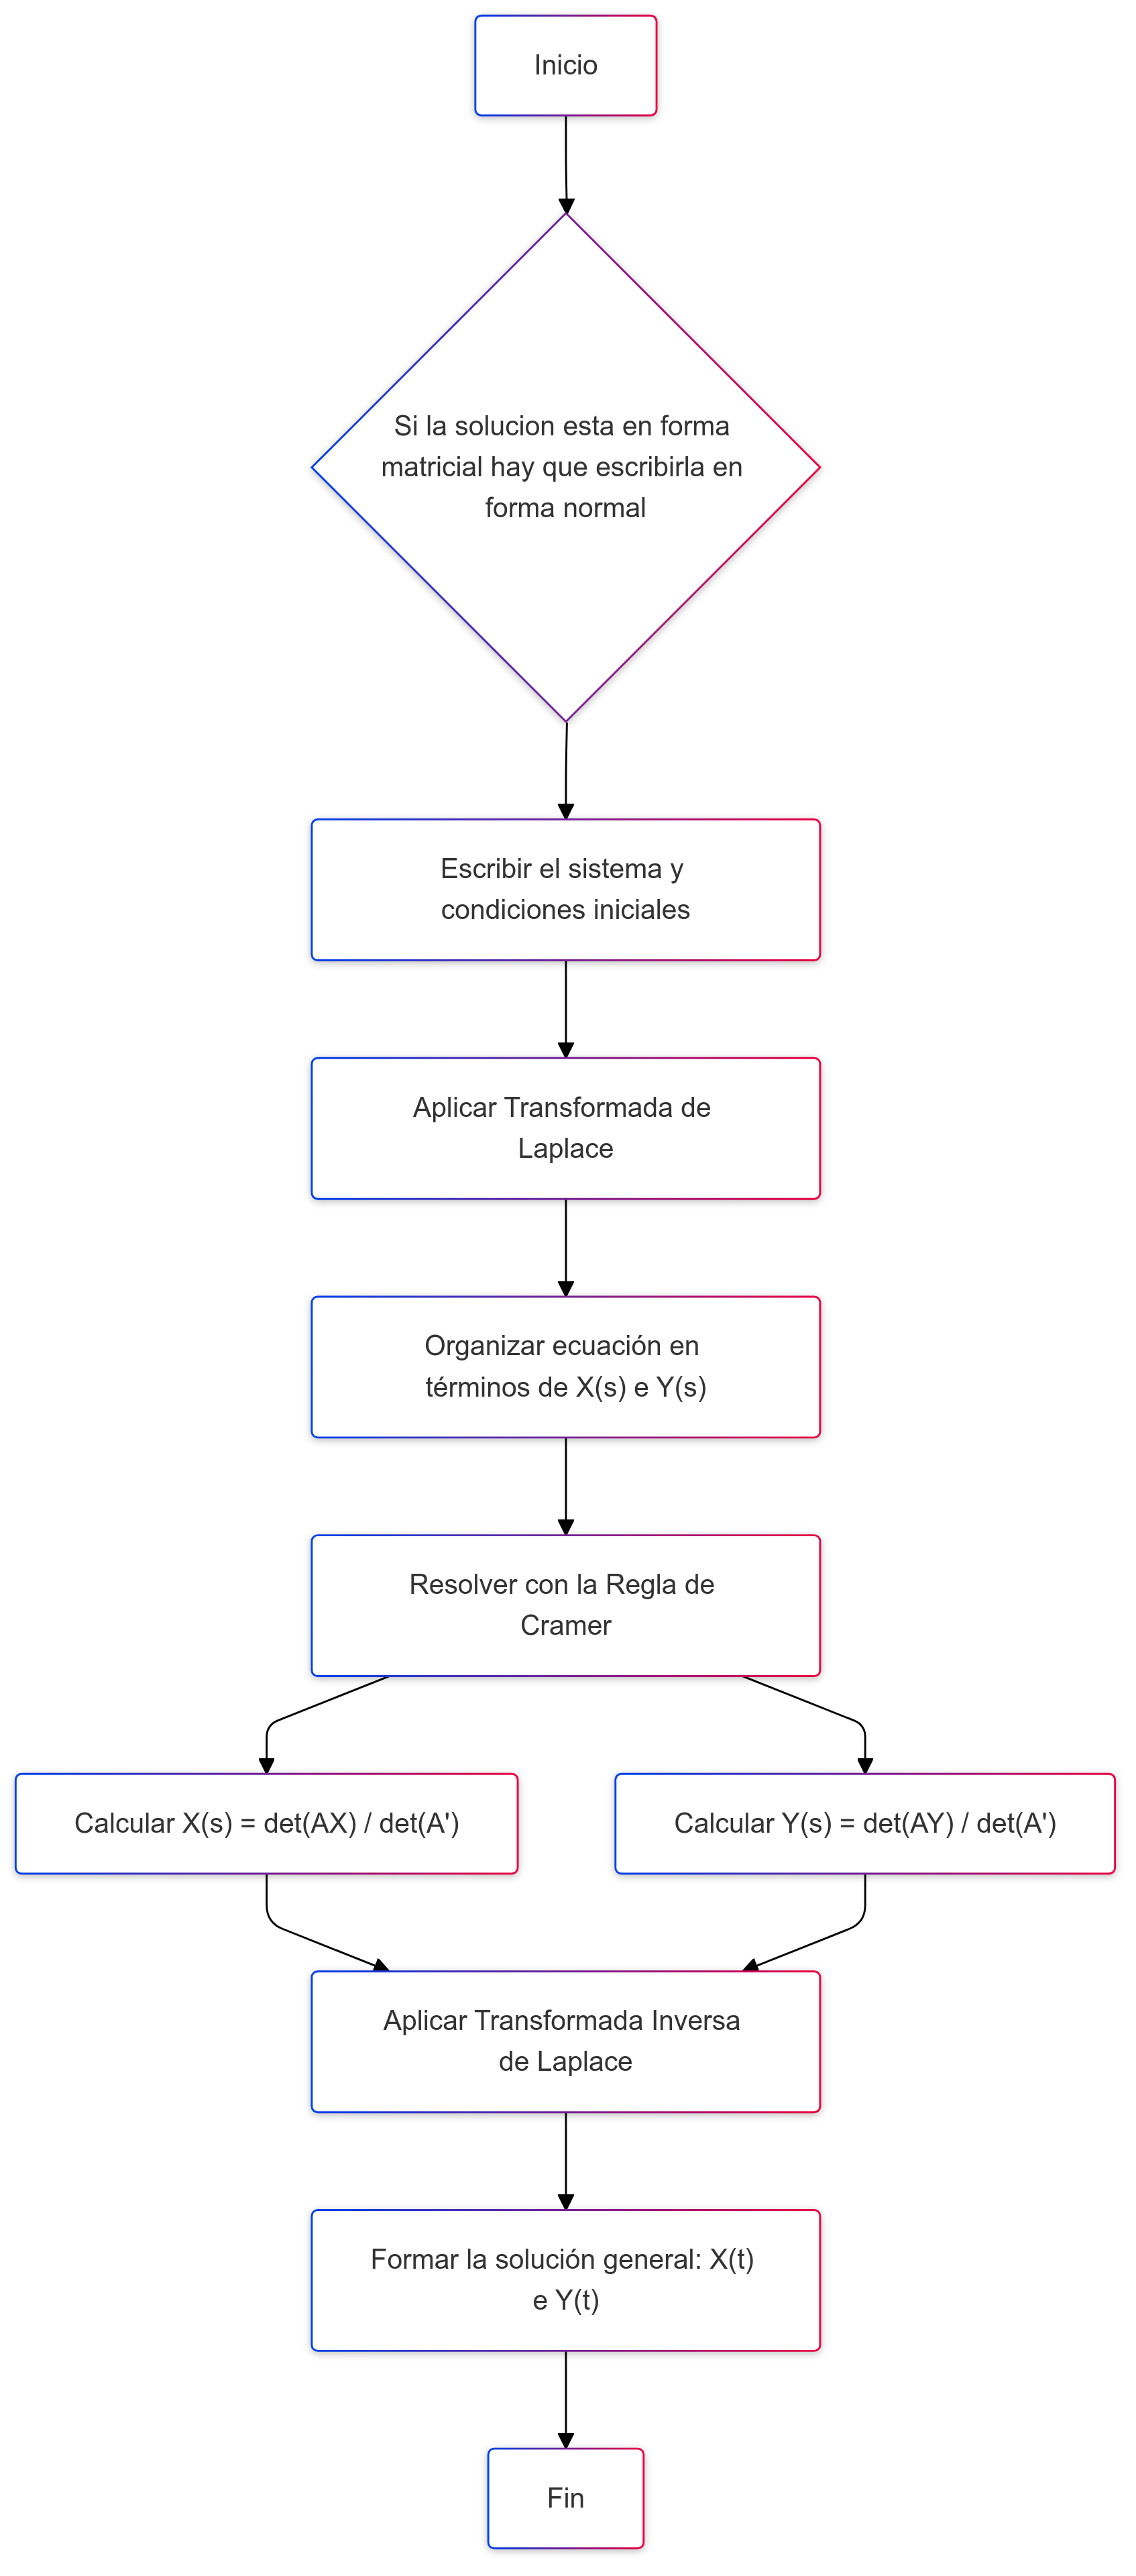


-   No Homogéneos aplicando variación de parámetros.
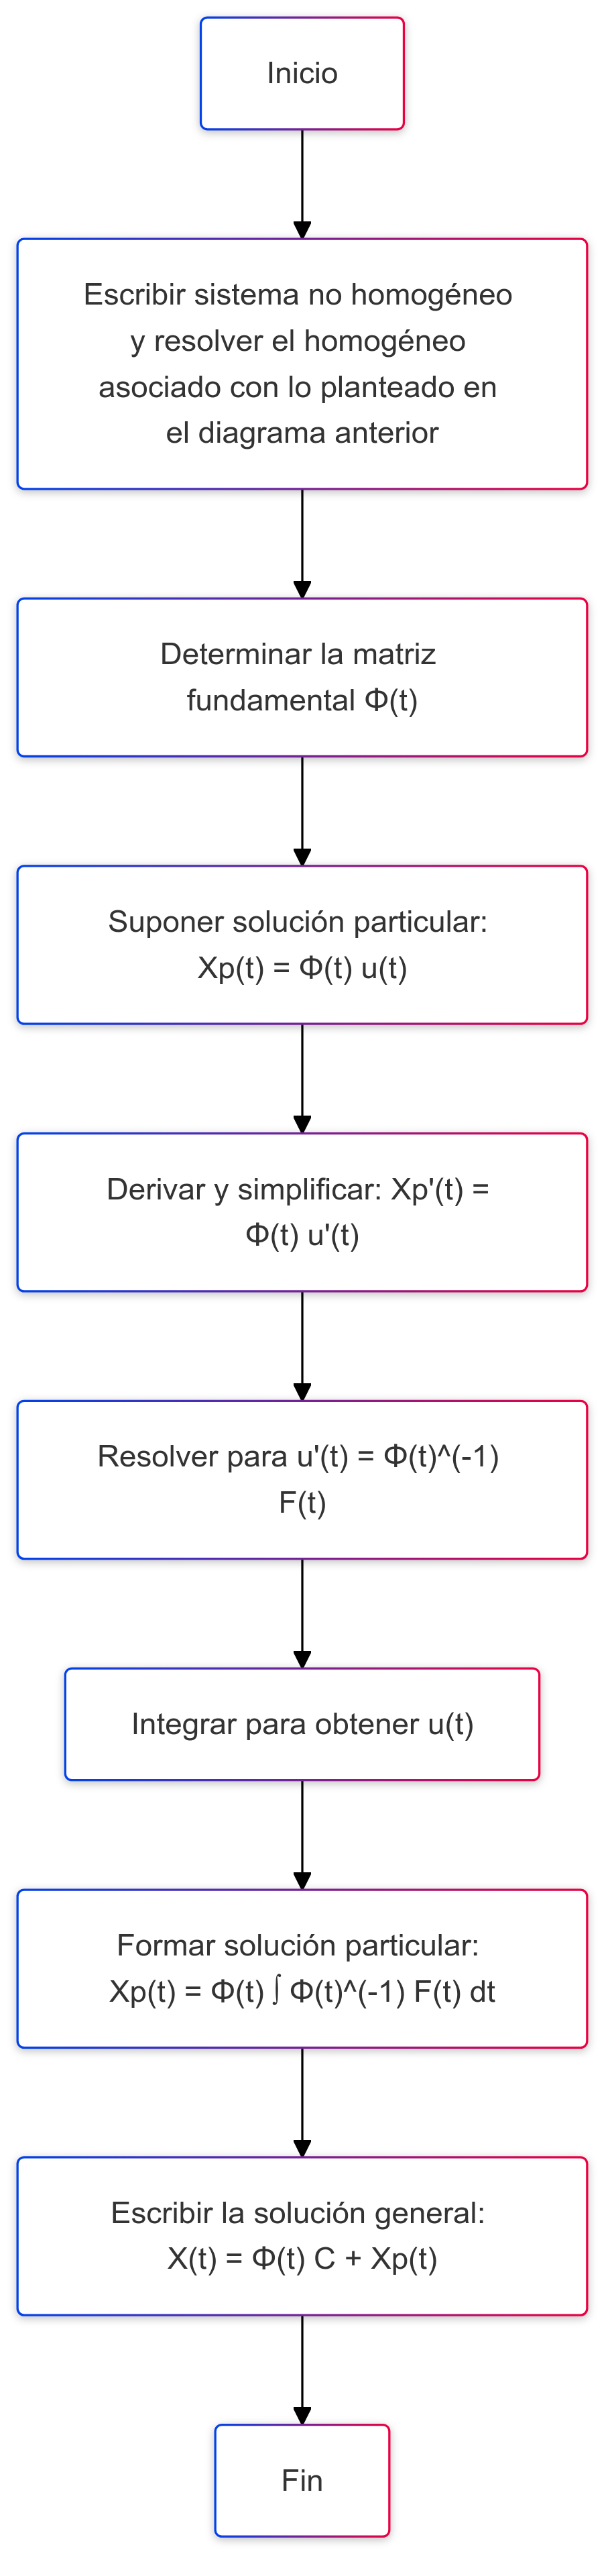


## Ejercicio 2
2) Realizar un esquema de la clasificación de los puntos de equilibrio y estabilidad asociada.
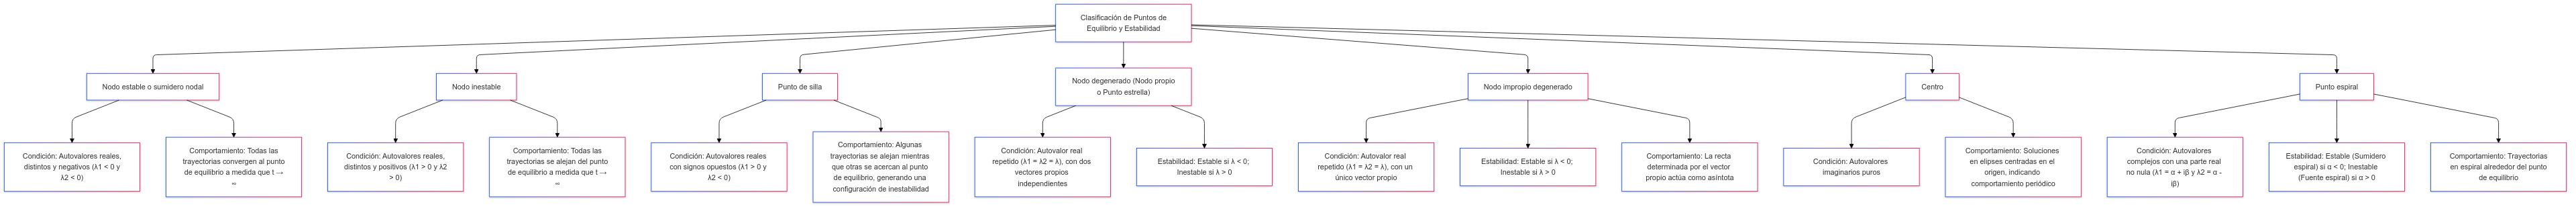

# Parte 2 

## Ejercicio 1 
a. Cada ejercicio deberá estar resuelto aplicando el código correspondiente en Python. 
b. Realizar la grafica de los campos vectoriales asociados y de las funciones solución. 
c. Analizar la estabilidad. 

In [6]:
print("---------------------3a----------------------")
import sympy as sp
# Definimos las variables y funciones simbólicamente
t, λ = sp.symbols('t λ')
x1, x2 = sp.symbols('x1 x2', cls=sp.Function)
X = sp.Matrix([x1(t), x2(t)])

# Definimos la matriz A y el vector de condición inicial
A = sp.Matrix([[1, 2], [4, 3]])

# Definimos el sistema de ecuaciones diferenciales y la condición inicial
sistema_eq = sp.Eq(X.diff(t), A * X)
display(sistema_eq)

I = sp.eye(2)
pol = (λ * I - A).det()
print("Polinomio característico:")
display(sp.simplify(pol))

autovalores = pol.as_poly(λ).all_roots()
print("Autovalores:")
display(autovalores)

autovectores = []
for val in autovalores:
    Av = val * I - A
    autovector = Av.nullspace()[0]
    autovectores.append(autovector)

print("Autovectores:")
for i, autovector in enumerate(autovectores):
    print(f"Autovector para λ = {autovalores[i]}:")
    display(autovector)

# Paso 4: Construir la solución general
C1, C2 = sp.symbols('C1 C2')
X = C1 * autovectores[0] * sp.exp(autovalores[0] * t) + C2 * autovectores[1] * sp.exp(autovalores[1] * t)

print("Solución general:")
X

---------------------3a----------------------


Eq(Matrix([
[Derivative(x1(t), t)],
[Derivative(x2(t), t)]]), Matrix([
[  x1(t) + 2*x2(t)],
[4*x1(t) + 3*x2(t)]]))

Polinomio característico:


λ**2 - 4*λ - 5

Autovalores:


[-1, 5]

Autovectores:
Autovector para λ = -1:


Matrix([
[-1],
[ 1]])

Autovector para λ = 5:


Matrix([
[1/2],
[  1]])

Solución general:


Matrix([
[-C1*exp(-t) + C2*exp(5*t)/2],
[   C1*exp(-t) + C2*exp(5*t)]])

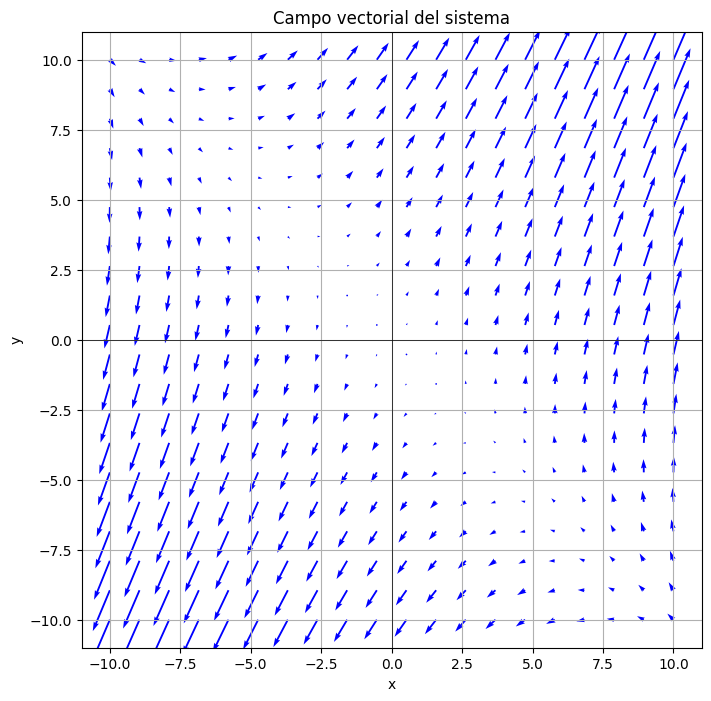

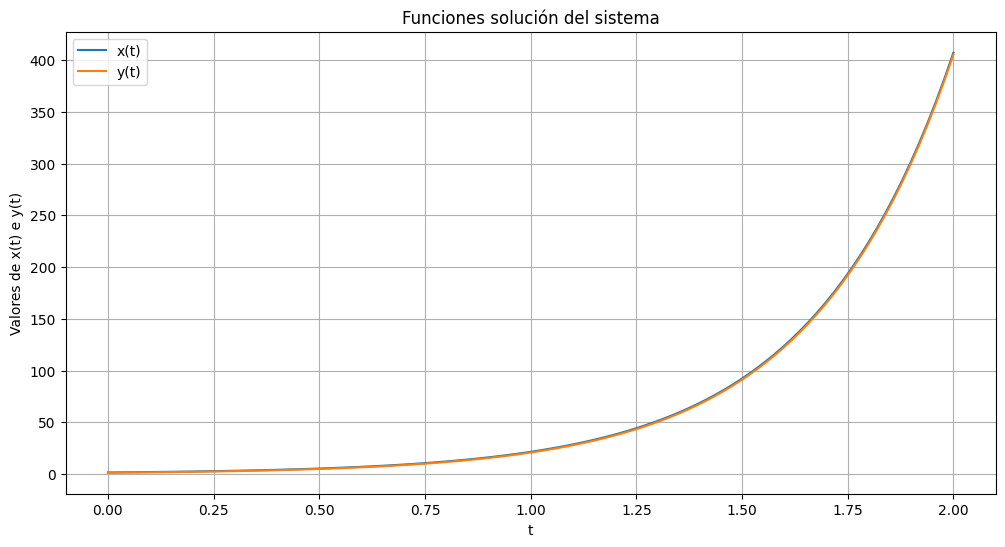

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def campo_vectorial(X, Y):
    dx = X + 2 * Y
    dy = 4 * X + 3 * Y
    return dx, dy

x = np.linspace(-10, 10, 20)
y = np.linspace(-10, 10, 20)
X, Y = np.meshgrid(x, y)
DX, DY = campo_vectorial(X, Y)

plt.figure(figsize=(8, 8))
plt.quiver(X, Y, DX, DY, color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo vectorial del sistema')
plt.grid()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

C1 = 1
C2 = 0.5

t_vals = np.linspace(0, 2, 100)

x_vals = C1 * np.exp(3 * t_vals) + C2 * np.exp(t_vals)
y_vals = C1 * np.exp(3 * t_vals) + (C2 / 2) * np.exp(t_vals)

plt.figure(figsize=(12, 6))
plt.plot(t_vals, x_vals, label='x(t)')
plt.plot(t_vals, y_vals, label='y(t)')
plt.xlabel('t')
plt.ylabel('Valores de x(t) e y(t)')
plt.title('Funciones solución del sistema')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import sympy as sp

# Paso 1: Definimos los símbolos para los elementos de la matriz M
a, b, c = sp.symbols('a b c')

# Paso 2: Definimos la matriz M como una matriz simétrica
M = sp.Matrix([[a, b], [b, c]])
print("Definición de la matriz M:")
display(M)

# Paso 3: Definimos la matriz A del sistema
A = sp.Matrix([[1, 2], [4, 3]])
print("Matriz A del sistema:")
display(A)

# Paso 4: Calculamos A^T * M + M * A
AT_M = A.T * M
M_A = M * A
lyapunov_eq = AT_M + M_A

print("Cálculo de A^T * M y M * A:")
print("A^T * M:")
display(AT_M)
print("M * A:")
display(M_A)
print("Suma A^T * M + M * A:")
display(lyapunov_eq)

# Paso 5: Definimos la matriz -I (matriz identidad multiplicada por -1)
N = -sp.eye(2)
print("Matriz -I:")
display(N)

# Paso 6: Planteamos la ecuación de Lyapunov: A^T * M + M * A = -I
print("Ecuación de Lyapunov: A^T * M + M * A = -I")
lyapunov_eq_set = sp.Eq(lyapunov_eq, N)
display(lyapunov_eq_set)

# Paso 7: Extraemos las ecuaciones individuales de la igualdad y las resolvemos
eqs = [sp.Eq(lyapunov_eq[i, j], N[i, j]) for i in range(2) for j in range(2)]
print("Sistema de ecuaciones resultante:")
display(eqs[0])
display(eqs[1])
display(eqs[2])
display(eqs[3])


# Paso 8: Resolver el sistema de ecuaciones para obtener los valores de a, b, y c
solution = sp.solve(eqs, (a, b, c))
print("Soluciones para a, b y c:")
display(solution)

# Paso 9: Sustituimos los valores encontrados en M para obtener la matriz M específica que satisface la ecuación de Lyapunov
M_solution = M.subs(solution)
print("Matriz M que satisface la ecuación de Lyapunov:")
display(M_solution)

# Paso 10: Calculamos los autovalores de M para verificar si es definida positiva
eigenvalues = M_solution.eigenvals()
print("Autovalores de la matriz M:")
for eigenval in eigenvalues:
    display(eigenval)

# Paso 11: Interpretación de los autovalores para verificar la positividad y conclusión sobre la estabilidad
positive_definite = all(val > 0 for val in eigenvalues)
print("Conclusión sobre la estabilidad:")
if positive_definite:
    print("Todos los autovalores son positivos. La matriz M es definida positiva, y el sistema es estable.")
else:
    print("Hay autovalores no positivos. La matriz M no es definida positiva, y no podemos concluir estabilidad.")

Definición de la matriz M:


Matrix([
[a, b],
[b, c]])

Matriz A del sistema:


Matrix([
[1, 2],
[4, 3]])

Cálculo de A^T * M y M * A:
A^T * M:


Matrix([
[  a + 4*b,   b + 4*c],
[2*a + 3*b, 2*b + 3*c]])

M * A:


Matrix([
[a + 4*b, 2*a + 3*b],
[b + 4*c, 2*b + 3*c]])

Suma A^T * M + M * A:


Matrix([
[      2*a + 8*b, 2*a + 4*b + 4*c],
[2*a + 4*b + 4*c,       4*b + 6*c]])

Matriz -I:


Matrix([
[-1,  0],
[ 0, -1]])

Ecuación de Lyapunov: A^T * M + M * A = -I


Eq(Matrix([
[      2*a + 8*b, 2*a + 4*b + 4*c],
[2*a + 4*b + 4*c,       4*b + 6*c]]), Matrix([
[-1,  0],
[ 0, -1]]))

Sistema de ecuaciones resultante:


Eq(2*a + 8*b, -1)

Eq(2*a + 4*b + 4*c, 0)

Eq(2*a + 4*b + 4*c, 0)

Eq(4*b + 6*c, -1)

Soluciones para a, b y c:


{a: 1/2, b: -1/4, c: 0}

Matriz M que satisface la ecuación de Lyapunov:


Matrix([
[ 1/2, -1/4],
[-1/4,    0]])

Autovalores de la matriz M:


1/4 - sqrt(2)/4

1/4 + sqrt(2)/4

Conclusión sobre la estabilidad:
Hay autovalores no positivos. La matriz M no es definida positiva, y no podemos concluir estabilidad.


In [ ]:
print("---------------------4e----------------------")
import sympy as sp
# Definimos las variables y funciones simbólicamente
t = sp.symbols('t')
x1, x2 = sp.symbols('x1 x2', cls=sp.Function)
X = sp.Matrix([x1(t), x2(t)])

# Definimos la matriz A y el vector de condición inicial
A = sp.Matrix([[3, -1], [9, -3]])

# Definimos el sistema de ecuaciones diferenciales y la condición inicial
sistema_eq = sp.Eq(X.diff(t), A * X)
display(sistema_eq)

print("Buscamos los autovalores de la matriz A")
# Definimos el símbolo lambda
lambda_ = sp.symbols('lambda')
# Definimos la matriz identidad del mismo tamaño que A
I = sp.eye(2)
# Calculamos A - lambda * I
A_lambda_I = A - lambda_ * I
display(sp.Symbol('det(A - λI) = 0'))
display(sp.Eq(A_lambda_I, sp.MatrixSymbol('0', 2, 2)))
# Calculamos el determinante de (A - lambda * I) y lo igualamos a 0
det_eq = sp.Eq(A_lambda_I.det(), 0)
# Mostramos el cálculo de det(A - lambda * I) = 0
display(det_eq)
eigenvalues = A.eigenvals()
display (eigenvalues)
print("Autovalores de A:")
for val, mult in eigenvalues.items():
    print(f"Autovalor: {val}, Multiplicidad: {mult}")

print("\n")
eigenvectors = A.eigenvects()
print("Buscamos los vectores propios de la matriz A asociados al autovalor λ = 0")
display(sp.Symbol('(A - 0I)K = 0'))
# Definimos el vector de variables (autovector)
k1, k2 = sp.symbols('k1 k2')
k = sp.Matrix([k1, k2])
# Calculamos (A - 0I) * K = 0
autovector_eq_k = sp.Eq((A - 0 * I) * k, sp.Matrix([0, 0]))
display(autovector_eq_k)  # Mostramos el sistema de ecuaciones

for val, mult, vect in eigenvectors:
    K = vect[0]
    print("Autovector asociado al autovalor 0:")
    display(K)

# Calcular el vector generalizado P
print("Calculamos el vector generalizado P")
display(sp.Symbol('(A - 0I)P = K'))
p1, p2 = sp.symbols('p1 p2')
p = sp.Matrix([p1, p2])

autovector_eq_p = sp.Eq((A - 0 * I) * p, K)
display(autovector_eq_p)

# Asumimos que p2 = 1 para obtener una solución particular
solucion_p = sp.solve(autovector_eq_p.subs(p2, 1), p1)

# Construimos el vector P con los valores obtenidos: p1 = solucion_p[p1], p2 = 1
P = sp.Matrix([solucion_p[p1], 1])
print("Autovector generalizado P:")
display(P)
print("\n")
print("Calculamos la solución general del sistema de ecuaciones diferenciales")
# Definimos los parámetros
t, c1, c2 = sp.symbols('t c1 c2')
lambda_val = 0 # Autovalor

# Autovector K y vector generalizado P
K = sp.Matrix([1/3, 1])
P = sp.Matrix([4/9, 1])

# Definimos los términos de la solución general
X1 = c1 * K * sp.exp(lambda_val * t)
X_1 = X1
X1 = sp.UnevaluatedExpr(X1)
X2 = c2 * (K * t + P) * sp.exp(lambda_val * t)
X_2 = X2
X2 = sp.UnevaluatedExpr(X2)

# Mostramos cada término de la solución de forma similar a la imagen
display(sp.MatrixSymbol('X(t) =',0,0), X1 + X2)

---------------------4e----------------------


Eq(Matrix([
[Derivative(x1(t), t)],
[Derivative(x2(t), t)]]), Matrix([
[  3*x1(t) - x2(t)],
[9*x1(t) - 3*x2(t)]]))

Buscamos los autovalores de la matriz A


det(A - λI) = 0

Eq(Matrix([
[3 - lambda,          -1],
[         9, -lambda - 3]]), 0)

Eq(lambda**2, 0)

{0: 2}

Autovalores de A:
Autovalor: 0, Multiplicidad: 2


Buscamos los vectores propios de la matriz A asociados al autovalor λ = 0


(A - 0I)K = 0

Eq(Matrix([
[  3*k1 - k2],
[9*k1 - 3*k2]]), Matrix([
[0],
[0]]))

Autovector asociado al autovalor 0:


Matrix([
[1/3],
[  1]])

Calculamos el vector generalizado P


(A - 0I)P = K

Eq(Matrix([
[  3*p1 - p2],
[9*p1 - 3*p2]]), Matrix([
[1/3],
[  1]]))

Autovector generalizado P:


Matrix([
[4/9],
[  1]])



Calculamos la solución general del sistema de ecuaciones diferenciales


X(t) =

Matrix([
[0.333333333333333*c1],
[                  c1]]) + Matrix([
[c2*(0.333333333333333*t + 0.444444444444444)],
[                                  c2*(t + 1)]])


Solución General:

X = C1 * Matrix([[0.333333333333333], [1]]) * e^(( [-1, 5] )*t) + C2 * [ Matrix([[0.333333333333333], [1]]) * t * e^(( [-1, 5] )*t) +  Matrix([[0.444444444444444], [1]])  * e^(( [-1, 5] )*t) ]


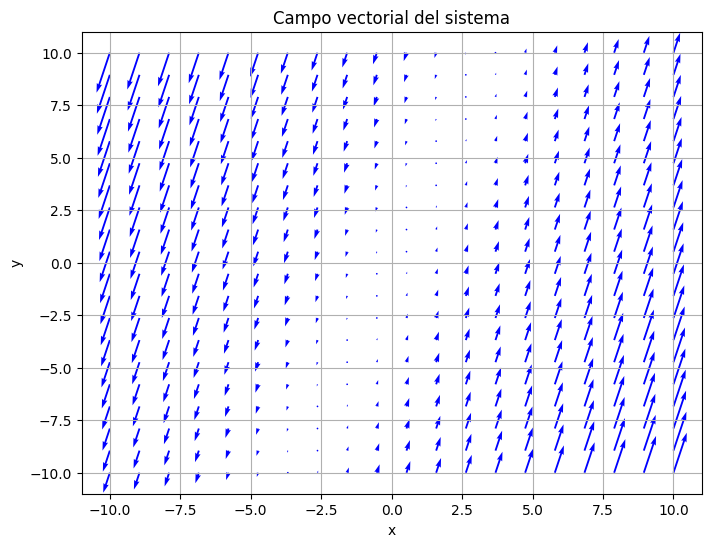

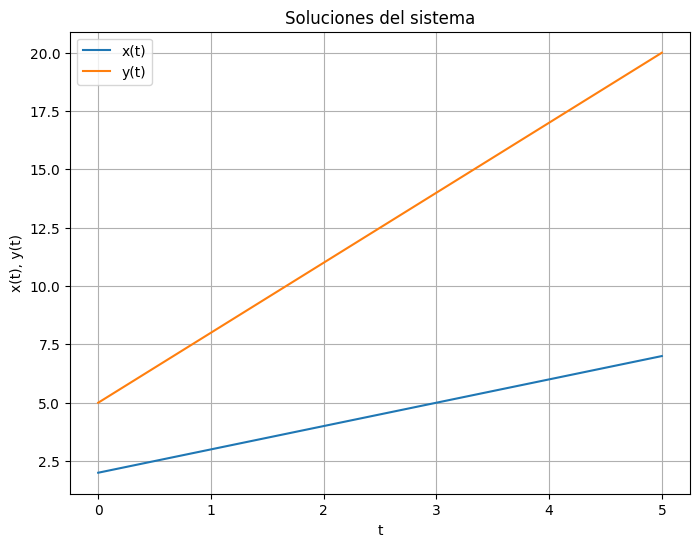

In [ ]:
# Definir el sistema de ecuaciones diferenciales
def sistema(X, t):
    x, y = X
    dxdt = 3*x - y
    dydt = 9*x - 3*y
    return [dxdt, dydt]

# Crear una malla para el campo vectorial
x_vals = np.linspace(-10, 10, 20)
y_vals = np.linspace(-10, 10, 20)
X_mesh, Y_mesh = np.meshgrid(x_vals, y_vals)
U = 3*X_mesh - Y_mesh
V = 9*X_mesh - 3*Y_mesh

print("")
print("Solución General:",)
print("")

print("X = C1 *", K,"* e^((", autovalores,")*t) + C2 * [", K,"* t * e^((", autovalores,")*t) + ",P, " * e^((", autovalores,")*t) ]")

# Graficar el campo vectorial
plt.figure(figsize=(8, 6))
plt.quiver(X_mesh, Y_mesh, U, V, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo vectorial del sistema')
plt.grid()
plt.show()

# Soluciones particulares
t = np.linspace(0, 5, 200)
c1, c2 = 1, 1  # Valores de las constantes
x_sol = c1 + c2 * (t + 1)
y_sol = 3*c1 + c2*(3*t + 2)

# Graficar las soluciones x(t) y y(t)
plt.figure(figsize=(8, 6))
plt.plot(t, x_sol, label='x(t)')
plt.plot(t, y_sol, label='y(t)')
plt.xlabel('t')
plt.ylabel('x(t), y(t)')
plt.title('Soluciones del sistema')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import sympy as sp

# Paso 1: Definimos los símbolos para los elementos de la matriz M
a, b, c = sp.symbols('a b c')

# Paso 2: Definimos la matriz M como una matriz simétrica
M = sp.Matrix([[a, b], [b, c]])
print("Definición de la matriz M:")
display(M)

# Paso 3: Definimos la matriz A del sistema
A = sp.Matrix([[3, -1], [9, -3]])
print("Matriz A del sistema:")
display(A)

# Paso 4: Calculamos A^T * M + M * A
AT_M = A.T * M
M_A = M * A
lyapunov_eq = AT_M + M_A

print("Cálculo de A^T * M y M * A:")
print("A^T * M:")
display(AT_M)
print("M * A:")
display(M_A)
print("Suma A^T * M + M * A:")
display(lyapunov_eq)

# Paso 5: Definimos la matriz -I (matriz identidad multiplicada por -1)
N = -sp.eye(2)
print("Matriz -I:")
display(N)

# Paso 6: Planteamos la ecuación de Lyapunov: A^T * M + M * A = -I
print("Ecuación de Lyapunov: A^T * M + M * A = -I")
lyapunov_eq_set = sp.Eq(lyapunov_eq, N)
display(lyapunov_eq_set)

# Paso 7: Extraemos las ecuaciones individuales de la igualdad y las resolvemos
eqs = [sp.Eq(lyapunov_eq[i, j], N[i, j]) for i in range(2) for j in range(2)]
print("Sistema de ecuaciones resultante:")
display(eqs[0])
display(eqs[1])
display(eqs[2])
display(eqs[3])


# Paso 8: Resolver el sistema de ecuaciones para obtener los valores de a, b, y c
solution = sp.solve(eqs, (a, b, c))
print("Soluciones para a, b y c:")
display(solution)

print("Como sympy.solve no puede resolver el sistema de ecuaciones, se procede a resolverlo manualmente")
print("Viendo el comportamiento del campo vectorial y que los valores de lambda λ = 0 son iguales, se puede decir que el punto critico (0,0) es un punto inestable")

Definición de la matriz M:


Matrix([
[a, b],
[b, c]])

Matriz A del sistema:


Matrix([
[3, -1],
[9, -3]])

Cálculo de A^T * M y M * A:
A^T * M:


Matrix([
[3*a + 9*b, 3*b + 9*c],
[ -a - 3*b,  -b - 3*c]])

M * A:


Matrix([
[3*a + 9*b, -a - 3*b],
[3*b + 9*c, -b - 3*c]])

Suma A^T * M + M * A:


Matrix([
[6*a + 18*b,   -a + 9*c],
[  -a + 9*c, -2*b - 6*c]])

Matriz -I:


Matrix([
[-1,  0],
[ 0, -1]])

Ecuación de Lyapunov: A^T * M + M * A = -I


Eq(Matrix([
[6*a + 18*b,   -a + 9*c],
[  -a + 9*c, -2*b - 6*c]]), Matrix([
[-1,  0],
[ 0, -1]]))

Sistema de ecuaciones resultante:


Eq(6*a + 18*b, -1)

Eq(-a + 9*c, 0)

Eq(-a + 9*c, 0)

Eq(-2*b - 6*c, -1)

Soluciones para a, b y c:


[]

Como sympy.solve no puede resolver el sistema de ecuaciones, se procede a resolverlo manualmente
Viendo el comportamiento del campo vectorial y que los valores de lambda λ = 0 son iguales, se puede decir que el punto critico (0,0) es un punto inestable


In [ ]:
print("---------------------51----------------------")
import sympy as sp
# Definimos las variables y funciones simbólicamente
t = sp.symbols('t')
x1, x2 = sp.symbols('x1 x2', cls=sp.Function)
X = sp.Matrix([x1(t), x2(t)])

# Definimos la matriz A y el vector de condición inicial
A = sp.Matrix([[6, -1], [5, 2]])
sistema_eq = sp.Eq(X.diff(t), A * X)

display(sistema_eq)

t, λ = sp.symbols('t λ')

I = sp.eye(2)
pol = (λ * I - A).det()
print("Polinomio característico:")
print(sp.simplify(pol))

autovalores = pol.as_poly(λ).all_roots()
print("Autovalores:")
display(autovalores)

autovectores = []
for val in autovalores:
    Av = val * I - A
    autovector = Av.nullspace()[0]
    autovectores.append(autovector)

print("Autovectores:")
for i, autovector in enumerate(autovectores):
    print(f"Autovector para λ = {autovalores[i]}:")
    display(autovector)

# Paso 4: Construir la solución general
C1, C2 = sp.symbols('C1 C2')
X = C1 * autovectores[0] * sp.exp(autovalores[0] * t) + C2 * autovectores[1] * sp.exp(autovalores[1] * t)

print("Solución general:")
X

---------------------51----------------------


Eq(Matrix([
[Derivative(x1(t), t)],
[Derivative(x2(t), t)]]), Matrix([
[  6*x1(t) - x2(t)],
[5*x1(t) + 2*x2(t)]]))

Polinomio característico:
λ**2 - 8*λ + 17
Autovalores:


[4 - I, 4 + I]

Autovectores:
Autovector para λ = 4 - I:


Matrix([
[2/5 - I/5],
[        1]])

Autovector para λ = 4 + I:


Matrix([
[2/5 + I/5],
[        1]])

Solución general:


Matrix([
[C1*(2/5 - I/5)*exp(t*(4 - I)) + C2*(2/5 + I/5)*exp(t*(4 + I))],
[                        C1*exp(t*(4 - I)) + C2*exp(t*(4 + I))]])

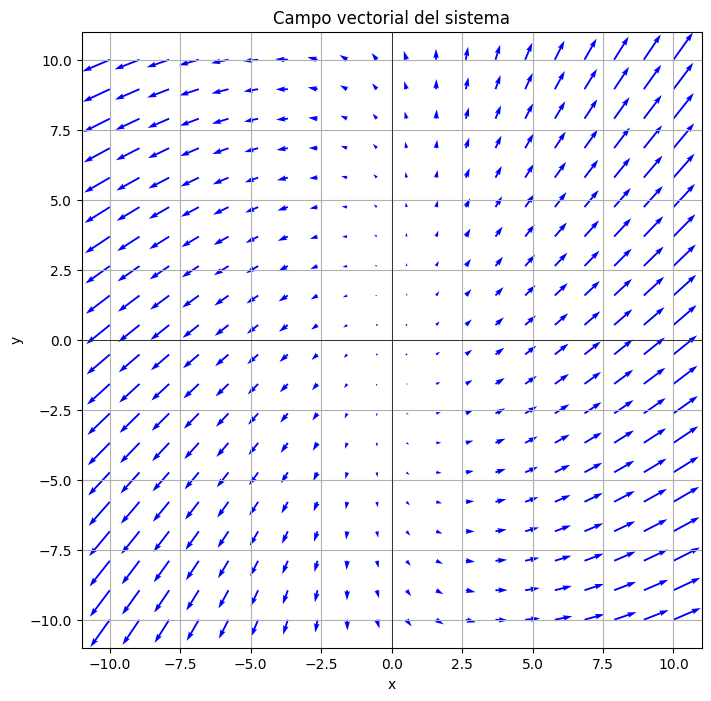

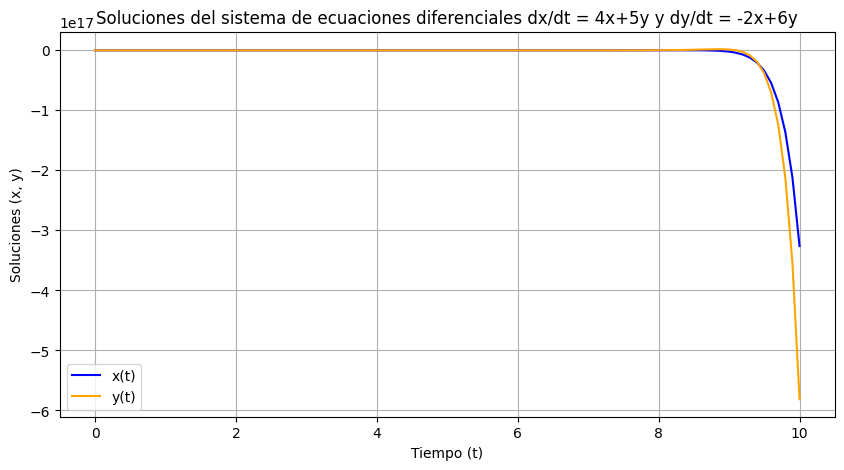

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def campo_vectorial(X, Y):
    dx = 6 * X - Y
    dy = 5 * X + 2 * Y
    return dx, dy

x = np.linspace(-10, 10, 20)
y = np.linspace(-10, 10, 20)
X, Y = np.meshgrid(x, y)
DX, DY = campo_vectorial(X, Y)

plt.figure(figsize=(8, 8))
plt.quiver(X, Y, DX, DY, color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo vectorial del sistema')
plt.grid()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

# Defino del sistema de ecuaciones

def sistema(t, z):
    x, y = z
    dxdt = 6 * x - y
    dydt = 5 * x + 2 * y
    return [dxdt, dydt]

# Condiciones iniciales
z0 = [1, 1]  # valor inicial de x y y
t_span = (0, 10)  # intervalo de tiempo
t_eval = np.linspace(t_span[0], t_span[1], 100)  # puntos donde se evalúa

# Resuelvo el sistema de ecuaciones
sol = solve_ivp(sistema, t_span, z0, t_eval=t_eval)

# Grafico los resultados
plt.figure(figsize=(10, 5))
plt.plot(sol.t, sol.y[0], label='x(t)', color='blue')
plt.plot(sol.t, sol.y[1], label='y(t)', color='orange')
plt.title('Soluciones del sistema de ecuaciones diferenciales dx/dt = 4x+5y y dy/dt = -2x+6y')
plt.xlabel('Tiempo (t)')
plt.ylabel('Soluciones (x, y)')
plt.grid()
plt.legend()
plt.show()

In [ ]:
import sympy as sp

# Paso 1: Definimos los símbolos para los elementos de la matriz M
a, b, c = sp.symbols('a b c')

# Paso 2: Definimos la matriz M como una matriz simétrica
M = sp.Matrix([[a, b], [b, c]])
print("Definición de la matriz M:")
display(M)

# Paso 3: Definimos la matriz A del sistema
A = sp.Matrix([[6, -1], [5, 2]])
print("Matriz A del sistema:")
display(A)

# Paso 4: Calculamos A^T * M + M * A
AT_M = A.T * M
M_A = M * A
lyapunov_eq = AT_M + M_A

print("Cálculo de A^T * M y M * A:")
print("A^T * M:")
display(AT_M)
print("M * A:")
display(M_A)
print("Suma A^T * M + M * A:")
display(lyapunov_eq)

# Paso 5: Definimos la matriz -I (matriz identidad multiplicada por -1)
N = -sp.eye(2)
print("Matriz -I:")
display(N)

# Paso 6: Planteamos la ecuación de Lyapunov: A^T * M + M * A = -I
print("Ecuación de Lyapunov: A^T * M + M * A = -I")
lyapunov_eq_set = sp.Eq(lyapunov_eq, N)
display(lyapunov_eq_set)

# Paso 7: Extraemos las ecuaciones individuales de la igualdad y las resolvemos
eqs = [sp.Eq(lyapunov_eq[i, j], N[i, j]) for i in range(2) for j in range(2)]
print("Sistema de ecuaciones resultante:")
display(eqs[0])
display(eqs[1])
display(eqs[2])
display(eqs[3])


# Paso 8: Resolver el sistema de ecuaciones para obtener los valores de a, b, y c
solution = sp.solve(eqs, (a, b, c))
print("Soluciones para a, b y c:")
display(solution)

# Paso 9: Sustituimos los valores encontrados en M para obtener la matriz M específica que satisface la ecuación de Lyapunov
M_solution = M.subs(solution)
print("Matriz M que satisface la ecuación de Lyapunov:")
display(M_solution)

# Paso 10: Calculamos los autovalores de M para verificar si es definida positiva
eigenvalues = M_solution.eigenvals()
print("Autovalores de la matriz M:")
for eigenval in eigenvalues:
    display(eigenval)

# Paso 11: Interpretación de los autovalores para verificar la positividad y conclusión sobre la estabilidad
positive_definite = all(val > 0 for val in eigenvalues)
print("Conclusión sobre la estabilidad:")
if positive_definite:
    print("Todos los autovalores son positivos. La matriz M es definida positiva, y el sistema es estable.")
else:
    print("Hay autovalores no positivos. La matriz M no es definida positiva, y no podemos concluir estabilidad.")

Definición de la matriz M:


Matrix([
[a, b],
[b, c]])

Matriz A del sistema:


Matrix([
[6, -1],
[5,  2]])

Cálculo de A^T * M y M * A:
A^T * M:


Matrix([
[6*a + 5*b, 6*b + 5*c],
[ -a + 2*b,  -b + 2*c]])

M * A:


Matrix([
[6*a + 5*b, -a + 2*b],
[6*b + 5*c, -b + 2*c]])

Suma A^T * M + M * A:


Matrix([
[   12*a + 10*b, -a + 8*b + 5*c],
[-a + 8*b + 5*c,     -2*b + 4*c]])

Matriz -I:


Matrix([
[-1,  0],
[ 0, -1]])

Ecuación de Lyapunov: A^T * M + M * A = -I


Eq(Matrix([
[   12*a + 10*b, -a + 8*b + 5*c],
[-a + 8*b + 5*c,     -2*b + 4*c]]), Matrix([
[-1,  0],
[ 0, -1]]))

Sistema de ecuaciones resultante:


Eq(12*a + 10*b, -1)

Eq(-a + 8*b + 5*c, 0)

Eq(-a + 8*b + 5*c, 0)

Eq(-2*b + 4*c, -1)

Soluciones para a, b y c:


{a: -23/136, b: 7/68, c: -27/136}

Matriz M que satisface la ecuación de Lyapunov:


Matrix([
[-23/136,    7/68],
[   7/68, -27/136]])

Autovalores de la matriz M:


-25/136 - 5*sqrt(2)/68

-25/136 + 5*sqrt(2)/68

Conclusión sobre la estabilidad:
Hay autovalores no positivos. La matriz M no es definida positiva, y no podemos concluir estabilidad.


In [ ]:
print ("---------------------6b----------------------")
import sympy as sp
# Definimos las variables y funciones simbólicamente
print("Declaramos las variables y funciones simbólicamente")
t = sp.symbols('t')
x1, x2 = sp.symbols('x1 x2', cls=sp.Function)
X = sp.Matrix([x1(t), x2(t)])

# Definimos la matriz A y el vector de condición inicial
A = sp.Matrix([[2, 4], [-1, 6]])
X0 = sp.Matrix([-1, 6])

# Definimos el sistema de ecuaciones diferenciales y la condición inicial
sistema_eq = sp.Eq(X.diff(t), A * X)
condicion_incial = sp.Eq(X.subs(t, 0), X0)

display(sistema_eq)
display(condicion_incial)

print("Buscamos los autovalores de la matriz A")
# Definimos el símbolo lambda
lambda_ = sp.symbols('lambda')
# Definimos la matriz identidad del mismo tamaño que A
I = sp.eye(2)
# Calculamos A - lambda * I
A_lambda_I = A - lambda_ * I
display(sp.Symbol('det(A - λI) = 0'))
display(sp.Eq(A_lambda_I, sp.MatrixSymbol('0', 2, 2)))
# Calculamos el determinante de (A - lambda * I) y lo igualamos a 0
det_eq = sp.Eq(A_lambda_I.det(), 0)
# Mostramos el cálculo de det(A - lambda * I) = 0
display(det_eq)
eigenvalues = A.eigenvals()
print("Autovalores de A:")
for val, mult in eigenvalues.items():
    print(f"Autovalor: {val}, Multiplicidad: {mult}")

print("\n")
eigenvectors = A.eigenvects()
print("Buscamos los vectores propios de la matriz A asociados al autovalor λ = 4")
display(sp.Symbol('(A - 4I)K = 0'))
# Definimos el vector de variables (autovector)
k1, k2 = sp.symbols('k1 k2')
k = sp.Matrix([k1, k2])
# Calculamos (A - 4I) * K = 0
autovector_eq_k = sp.Eq((A - 4 * I) * k, sp.Matrix([0, 0]))
display(autovector_eq_k)  # Mostramos el sistema de ecuaciones
# Filtramos para obtener el autovector asociado al autovalor λ = 4
for val, mult, vect in eigenvectors:
    if val == 4:
        K = vect[0]
        print("Autovector asociado al autovalor 4:")
        display(K)

# Calcular el vector generalizado P
print("Calculamos el vector generalizado P")
display(sp.Symbol('(A - 4I)P = K'))
p1, p2 = sp.symbols('p1 p2')
p = sp.Matrix([p1, p2])
# Resolver (A - 4I) * P = K
autovector_eq_p = sp.Eq((A - 4 * I) * p, K)
display(autovector_eq_p)

# Asumimos que p2 = 1 para obtener una solución particular
solucion_p = sp.solve(autovector_eq_p.subs(p2, 1), p1)

# Construimos el vector P con los valores obtenidos: p1 = solucion_p[p1], p2 = 1
P = sp.Matrix([solucion_p[p1], 1])
print("Autovector generalizado P:")
display(P)
print("\n")
print("Calculamos la solución general del sistema de ecuaciones diferenciales")
# Definimos los parámetros
t, c1, c2 = sp.symbols('t c1 c2')
lambda_val = 4 # Autovalor

# Autovector K y vector generalizado P
K = sp.Matrix([2, 1])
P = sp.Matrix([1, 1])

# Definimos los términos de la solución general
X1 = c1 * K * sp.exp(lambda_val * t)
X_1 = X1
X1 = sp.UnevaluatedExpr(X1)
X2 = c2 * (K * t + P) * sp.exp(lambda_val * t)
X_2 = X2
X2 = sp.UnevaluatedExpr(X2)

# Mostramos cada término de la solución de forma similar a la imagen
display(sp.MatrixSymbol('X(t) =',0,0), X1 + X2)

print("\n")
print("Calculamos la solución particular del sistema de ecuaciones diferenciales, con las condiciones iniciales X(0) = [-1, 6]")
# Evaluamos X(0) usando la condición inicial


X_0 = X_1 + X_2
X_0 = sp.Matrix(X_0).subs(t, 0)
display(sp.MatrixSymbol('X(0) =',0,0), X_0)
# Igualamos X(0) a la condición inicial y resolvemos para c1 y c2
ecuacion = [sp.Eq(X_0[i], X0[i]) for i in range(2)]
print("Resolvemos el sistema de ecuaciones, teniendo en cuenta los valores de la condicion incial")
display(ecuacion[0], ecuacion[1])

# Resolución del sistema de ecuaciones
solution = sp.solve(ecuacion, (c1, c2))
print ("Solución del sistema de ecuaciones:")
print ("C1: ", solution[c1])
print ("C2: ", solution[c2])



---------------------6b----------------------
Declaramos las variables y funciones simbólicamente


Eq(Matrix([
[Derivative(x1(t), t)],
[Derivative(x2(t), t)]]), Matrix([
[2*x1(t) + 4*x2(t)],
[ -x1(t) + 6*x2(t)]]))

Eq(Matrix([
[x1(0)],
[x2(0)]]), Matrix([
[-1],
[ 6]]))

Buscamos los autovalores de la matriz A


det(A - λI) = 0

Eq(Matrix([
[2 - lambda,          4],
[        -1, 6 - lambda]]), 0)

Eq(lambda**2 - 8*lambda + 16, 0)

Autovalores de A:
Autovalor: 4, Multiplicidad: 2


Buscamos los vectores propios de la matriz A asociados al autovalor λ = 4


(A - 4I)K = 0

Eq(Matrix([
[-2*k1 + 4*k2],
[  -k1 + 2*k2]]), Matrix([
[0],
[0]]))

Autovector asociado al autovalor 4:


Matrix([
[2],
[1]])

Calculamos el vector generalizado P


(A - 4I)P = K

Eq(Matrix([
[-2*p1 + 4*p2],
[  -p1 + 2*p2]]), Matrix([
[2],
[1]]))

Autovector generalizado P:


Matrix([
[1],
[1]])



Calculamos la solución general del sistema de ecuaciones diferenciales


X(t) =

Matrix([
[2*c1*exp(4*t)],
[  c1*exp(4*t)]]) + Matrix([
[c2*(2*t + 1)*exp(4*t)],
[  c2*(t + 1)*exp(4*t)]])



Calculamos la solución particular del sistema de ecuaciones diferenciales, con las condiciones iniciales X(0) = [-1, 6]


X(0) =

Matrix([
[2*c1 + c2],
[  c1 + c2]])

Resolvemos el sistema de ecuaciones, teniendo en cuenta los valores de la condicion incial


Eq(2*c1 + c2, -1)

Eq(c1 + c2, 6)

Solución del sistema de ecuaciones:
C1:  -7
C2:  13


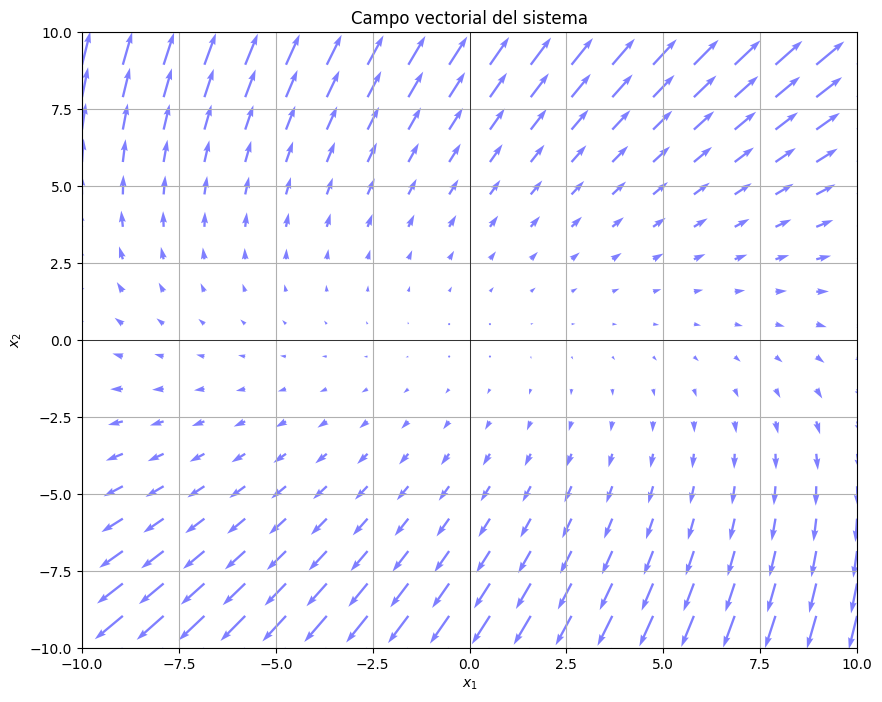

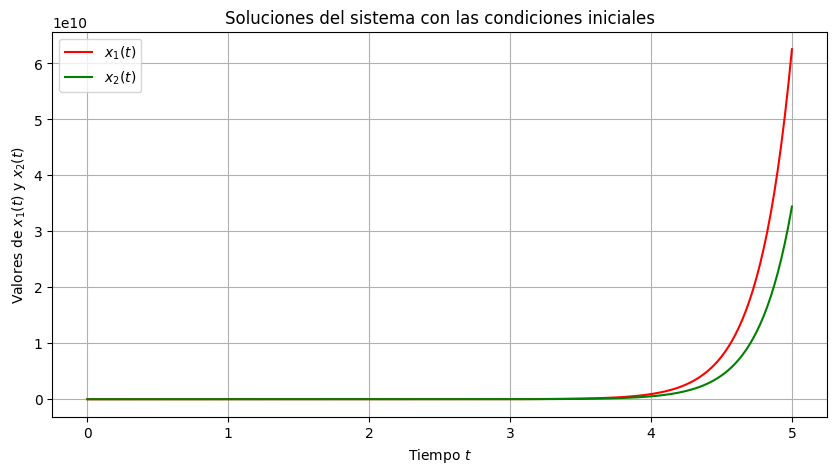

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import solve_ivp

# Definimos la matriz del sistema
A = np.array([[2, 4], [-1, 6]])

# Configuración de la grilla para el campo vectorial
x_vals = np.linspace(-10, 10, 20)
y_vals = np.linspace(-10, 10, 20)
X, Y = np.meshgrid(x_vals, y_vals)

# Calculamos los vectores del campo en cada punto de la grilla
U = A[0, 0] * X + A[0, 1] * Y
V = A[1, 0] * X + A[1, 1] * Y

# Graficamos el campo vectorial
plt.figure(figsize=(10, 8))
plt.quiver(X, Y, U, V, color="b", alpha=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("Campo vectorial del sistema")
plt.grid()
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

# Parte 2: Graficar las soluciones del sistema
# Definimos la función del sistema de ecuaciones diferenciales para `solve_ivp`
def sistema(t, X):
    return A @ X

# Condiciones iniciales
X0 = [-1, 6]

# Intervalo de tiempo para la solución
t_span = (0, 5)
t_eval = np.linspace(0, 5, 200)

# Resolver el sistema usando `solve_ivp`
sol = solve_ivp(sistema, t_span, X0, t_eval=t_eval)

# Graficamos las soluciones x1(t) y x2(t) en función de t
plt.figure(figsize=(10, 5))
plt.plot(sol.t, sol.y[0], label='$x_1(t)$', color='r')
plt.plot(sol.t, sol.y[1], label='$x_2(t)$', color='g')
plt.xlabel('Tiempo $t$')
plt.ylabel('Valores de $x_1(t)$ y $x_2(t)$')
plt.title("Soluciones del sistema con las condiciones iniciales")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import sympy as sp

# Paso 1: Definimos los símbolos para los elementos de la matriz M
a, b, c = sp.symbols('a b c')

# Paso 2: Definimos la matriz M como una matriz simétrica
M = sp.Matrix([[a, b], [b, c]])
print("Definición de la matriz M:")
display(M)

# Paso 3: Definimos la matriz A del sistema
A = sp.Matrix([[2, 4], [-1, 6]])
print("Matriz A del sistema:")
display(A)

# Paso 4: Calculamos A^T * M + M * A
AT_M = A.T * M
M_A = M * A
lyapunov_eq = AT_M + M_A

print("Cálculo de A^T * M y M * A:")
print("A^T * M:")
display(AT_M)
print("M * A:")
display(M_A)
print("Suma A^T * M + M * A:")
display(lyapunov_eq)

# Paso 5: Definimos la matriz -I (matriz identidad multiplicada por -1)
N = -sp.eye(2)
print("Matriz -I:")
display(N)

# Paso 6: Planteamos la ecuación de Lyapunov: A^T * M + M * A = -I
print("Ecuación de Lyapunov: A^T * M + M * A = -I")
lyapunov_eq_set = sp.Eq(lyapunov_eq, N)
display(lyapunov_eq_set)

# Paso 7: Extraemos las ecuaciones individuales de la igualdad y las resolvemos
eqs = [sp.Eq(lyapunov_eq[i, j], N[i, j]) for i in range(2) for j in range(2)]
print("Sistema de ecuaciones resultante:")
display(eqs[0])
display(eqs[1])
display(eqs[2])
display(eqs[3])


# Paso 8: Resolver el sistema de ecuaciones para obtener los valores de a, b, y c
solution = sp.solve(eqs, (a, b, c))
print("Soluciones para a, b y c:")
display(solution)

# Paso 9: Sustituimos los valores encontrados en M para obtener la matriz M específica que satisface la ecuación de Lyapunov
M_solution = M.subs(solution)
print("Matriz M que satisface la ecuación de Lyapunov:")
display(M_solution)

# Paso 10: Calculamos los autovalores de M para verificar si es definida positiva
eigenvalues = M_solution.eigenvals()
print("Autovalores de la matriz M:")
for eigenval in eigenvalues:
    display(eigenval)

# Paso 11: Interpretación de los autovalores para verificar la positividad y conclusión sobre la estabilidad
positive_definite = all(val > 0 for val in eigenvalues)
print("Conclusión sobre la estabilidad:")
if positive_definite:
    print("Todos los autovalores son positivos. La matriz M es definida positiva, y el sistema es estable.")
else:
    print("Hay autovalores no positivos. La matriz M no es definida positiva, y no podemos concluir estabilidad.")


Definición de la matriz M:


Matrix([
[a, b],
[b, c]])

Matriz A del sistema:


Matrix([
[ 2, 4],
[-1, 6]])

Cálculo de A^T * M y M * A:
A^T * M:


Matrix([
[  2*a - b,   2*b - c],
[4*a + 6*b, 4*b + 6*c]])

M * A:


Matrix([
[2*a - b, 4*a + 6*b],
[2*b - c, 4*b + 6*c]])

Suma A^T * M + M * A:


Matrix([
[    4*a - 2*b, 4*a + 8*b - c],
[4*a + 8*b - c,    8*b + 12*c]])

Matriz -I:


Matrix([
[-1,  0],
[ 0, -1]])

Ecuación de Lyapunov: A^T * M + M * A = -I


Eq(Matrix([
[    4*a - 2*b, 4*a + 8*b - c],
[4*a + 8*b - c,    8*b + 12*c]]), Matrix([
[-1,  0],
[ 0, -1]]))

Sistema de ecuaciones resultante:


Eq(4*a - 2*b, -1)

Eq(4*a + 8*b - c, 0)

Eq(4*a + 8*b - c, 0)

Eq(8*b + 12*c, -1)

Soluciones para a, b y c:


{a: -53/256, b: 11/128, c: -9/64}

Matriz M que satisface la ecuación de Lyapunov:


Matrix([
[-53/256, 11/128],
[ 11/128,  -9/64]])

Autovalores de la matriz M:


-89/512 - 5*sqrt(89)/512

-89/512 + 5*sqrt(89)/512

Conclusión sobre la estabilidad:
Hay autovalores no positivos. La matriz M no es definida positiva, y no podemos concluir estabilidad.


## Ejercicio 2

Sistemas no homogéneos con variación de parámetros (punto 7 de la guía). Debe generar el 
código necesario para resolver el sistema asignado de manera tal que se visualicen los pasos de 
resolución con este método, su solución y su grafica. 

In [ ]:
print ("---------------------7e----------------------")
import sympy as sp

# Definimos las variables y funciones simbólicas
t = sp.symbols('t')
x1, x2 = sp.symbols('x1 x2', cls=sp.Function)
X = sp.Matrix([x1(t), x2(t)])
x, y = sp.symbols('x y', cls=sp.Function)

# Definimos la matriz A (sistema homogéneo asociado) y el término no homogéneo F
A = sp.Matrix([[0, 2], [-1, 3]])
sistema_eq = sp.Eq(X.diff(t), A * X)
display(sistema_eq)
F = sp.Matrix([[1], [-1]]) * sp.exp(t)
print("Termino no homogeneo F:")
display(F)

# Definimos el vector de funciones
X = sp.Matrix([x(t), y(t)])

# 1. Resolvemos el sistema homogéneo asociado
# X' = A * X
sol_homogenea = sp.dsolve(X.diff(t) - A * X)

# Extraemos la solución homogénea
C1, C2 = sp.symbols('C1 C2')
X_h = sp.Matrix([sol_homogenea[0].rhs, sol_homogenea[1].rhs])
print("Solución homogénea:")
display(X_h)

# 2. Calculamos la solución particular usando variación de parámetros
# Calculamos el Wronskiano de la solución homogénea
W = X_h.jacobian([C1, C2])

W_inv = W.inv()
print("Matriz fundamental:")
display(W_inv)
# Variación de parámetros: solución particular
sol_particular_integ = W_inv * F
sol_particular = sp.integrate(sol_particular_integ, t)
print("Solución particular:")
display(sol_particular)

# 3. La solución general es la suma de la solución homogénea y la particular
solucion_general = X_h + sol_particular
print("Solución general:")
display(solucion_general.simplify())

---------------------7e----------------------


Eq(Matrix([
[Derivative(x1(t), t)],
[Derivative(x2(t), t)]]), Matrix([
[         2*x2(t)],
[-x1(t) + 3*x2(t)]]))

Termino no homogeneo F:


Matrix([
[ exp(t)],
[-exp(t)]])

Solución homogénea:


Matrix([
[2*C1*exp(t) + C2*exp(2*t)],
[  C1*exp(t) + C2*exp(2*t)]])

Matriz fundamental:


Matrix([
[   exp(-t),    -exp(-t)],
[-exp(-2*t), 2*exp(-2*t)]])

Solución particular:


Matrix([
[      2*t],
[3*exp(-t)]])

Solución general:


Matrix([
[        2*C1*exp(t) + C2*exp(2*t) + 2*t],
[((C1 + C2*exp(t))*exp(2*t) + 3)*exp(-t)]])

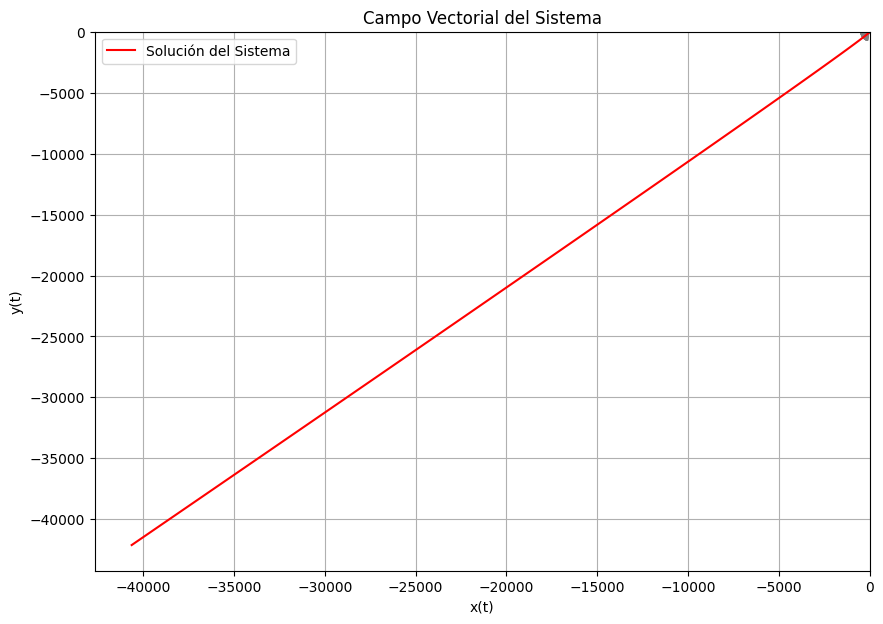

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definimos la matriz A y el término no homogéneo F
A = np.array([[0, 2], [-1, 3]])

# Definimos el sistema de ecuaciones diferenciales
def sistema(X, t):
    x, y = X
    F = np.array([np.exp(t), -np.exp(t)])
    dXdt = A.dot(X) + F
    return dXdt

# Creamos una cuadrícula para el campo vectorial
Y, X = np.mgrid[-10:10:20j, -10:10:20j]
U = A[0, 0] * X + A[0, 1] * Y + np.exp(0)
V = A[1, 0] * X + A[1, 1] * Y - np.exp(0)

# Graficamos el campo vectorial
plt.figure(figsize=(10, 7))
plt.streamplot(X, Y, U, V, color='gray', density=1.0)
plt.title("Campo Vectorial del Sistema")

# Resolvemos el sistema para condiciones iniciales específicas
t = np.linspace(0, 5, 100)  # intervalo de tiempo
condiciones_iniciales = [1, 1]  # puedes cambiar las condiciones iniciales

# Integramos el sistema usando scipy.odeint
sol = odeint(sistema, condiciones_iniciales, t)

# Graficamos las soluciones en el campo vectorial
plt.plot(sol[:, 0], sol[:, 1], 'r', label="Solución del Sistema")
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import sympy as sp

# Paso 1: Definimos los símbolos para los elementos de la matriz M
a, b, c = sp.symbols('a b c')

# Paso 2: Definimos la matriz M como una matriz simétrica
M = sp.Matrix([[a, b], [b, c]])
print("Definición de la matriz M:")
display(M)

# Paso 3: Definimos la matriz A del sistema
A = sp.Matrix([[0, 2], [-1, 3]])
print("Matriz A del sistema:")
display(A)

# Paso 4: Calculamos A^T * M + M * A
AT_M = A.T * M
M_A = M * A
lyapunov_eq = AT_M + M_A

print("Cálculo de A^T * M y M * A:")
print("A^T * M:")
display(AT_M)
print("M * A:")
display(M_A)
print("Suma A^T * M + M * A:")
display(lyapunov_eq)

# Paso 5: Definimos la matriz -I (matriz identidad multiplicada por -1)
N = -sp.eye(2)
print("Matriz -I:")
display(N)

# Paso 6: Planteamos la ecuación de Lyapunov: A^T * M + M * A = -I
print("Ecuación de Lyapunov: A^T * M + M * A = -I")
lyapunov_eq_set = sp.Eq(lyapunov_eq, N)
display(lyapunov_eq_set)

# Paso 7: Extraemos las ecuaciones individuales de la igualdad y las resolvemos
eqs = [sp.Eq(lyapunov_eq[i, j], N[i, j]) for i in range(2) for j in range(2)]
print("Sistema de ecuaciones resultante:")
display(eqs[0])
display(eqs[1])
display(eqs[2])
display(eqs[3])


# Paso 8: Resolver el sistema de ecuaciones para obtener los valores de a, b, y c
solution = sp.solve(eqs, (a, b, c))
print("Soluciones para a, b y c:")
display(solution)

# Paso 9: Sustituimos los valores encontrados en M para obtener la matriz M específica que satisface la ecuación de Lyapunov
M_solution = M.subs(solution)
print("Matriz M que satisface la ecuación de Lyapunov:")
display(M_solution)

# Paso 10: Calculamos los autovalores de M para verificar si es definida positiva
eigenvalues = M_solution.eigenvals()
print("Autovalores de la matriz M:")
for eigenval in eigenvalues:
    display(eigenval)

# Paso 11: Interpretación de los autovalores para verificar la positividad y conclusión sobre la estabilidad
positive_definite = all(val > 0 for val in eigenvalues)
print("Conclusión sobre la estabilidad:")
if positive_definite:
    print("Todos los autovalores son positivos. La matriz M es definida positiva, y el sistema es estable.")
else:
    print("Hay autovalores no positivos. La matriz M no es definida positiva, y no podemos concluir estabilidad.")

Definición de la matriz M:


Matrix([
[a, b],
[b, c]])

Matriz A del sistema:


Matrix([
[ 0, 2],
[-1, 3]])

Cálculo de A^T * M y M * A:
A^T * M:


Matrix([
[       -b,        -c],
[2*a + 3*b, 2*b + 3*c]])

M * A:


Matrix([
[-b, 2*a + 3*b],
[-c, 2*b + 3*c]])

Suma A^T * M + M * A:


Matrix([
[         -2*b, 2*a + 3*b - c],
[2*a + 3*b - c,     4*b + 6*c]])

Matriz -I:


Matrix([
[-1,  0],
[ 0, -1]])

Ecuación de Lyapunov: A^T * M + M * A = -I


Eq(Matrix([
[         -2*b, 2*a + 3*b - c],
[2*a + 3*b - c,     4*b + 6*c]]), Matrix([
[-1,  0],
[ 0, -1]]))

Sistema de ecuaciones resultante:


Eq(-2*b, -1)

Eq(2*a + 3*b - c, 0)

Eq(2*a + 3*b - c, 0)

Eq(4*b + 6*c, -1)

Soluciones para a, b y c:


{a: -1, b: 1/2, c: -1/2}

Matriz M que satisface la ecuación de Lyapunov:


Matrix([
[ -1,  1/2],
[1/2, -1/2]])

Autovalores de la matriz M:


-3/4 - sqrt(5)/4

-3/4 + sqrt(5)/4

Conclusión sobre la estabilidad:
Hay autovalores no positivos. La matriz M no es definida positiva, y no podemos concluir estabilidad.


## Ejercicio 3

Sistemas no homogéneos con Laplace (punto 8).  Debe generar el código necesario para resolver 
el sistema asignado de manera tal que se visualicen los pasos de resolución con este método, 
su solución y su grafica. 

In [ ]:
print("---------------------8----------------------")
import sympy as sp

# Definimos las variables y funciones necesarias
t, s = sp.symbols('t s')
x1, x2 = sp.symbols('x1 x2', cls=sp.Function)
A = sp.Matrix([[1, 6], [-1, 6]])
print("Matriz A del sistema:")
display(A)
x, y = sp.symbols('x y', cls=sp.Function)
f = sp.exp(t)  # f(t) = e^t
g = 0           # g(t) = 0

# Condiciones iniciales
initial_conditions = {x(1): 1, y(2): 1}
print ("Parte no homogenea")
display(f, g)
print("Condiciones iniciales:")
display(initial_conditions)


# Definimos x(t) y y(t) como funciones de t
x_t, y_t = sp.symbols('x(t) y(t)', cls=sp.Function)

# Expresamos las ecuaciones diferenciales en su forma original
eq1_diff = sp.Eq(x_t(t).diff(t), x_t(t) + 6 * y_t(t) + sp.exp(t))
eq2_diff = sp.Eq(y_t(t).diff(t), -x_t(t) + 6 * y_t(t))


print("Ecuaciones diferenciales originales:")
display(eq1_diff, eq2_diff)

# Definir las funciones transformadas de Laplace
X_s = sp.Function('X')(s)
Y_s = sp.Function('Y')(s)

# Condiciones iniciales aplicando traslación para x(1) = 1 y y(2) = 1
initial_x_shift = sp.exp(-s) * 1  # x(1) = 1
initial_y_shift = sp.exp(-2*s) * 1  # y(2) = 1

# Sistema de ecuaciones diferenciales en el dominio de Laplace con condiciones desplazadas
eq1 = sp.Eq(s * X_s - initial_x_shift, X_s + 6 * Y_s + sp.laplace_transform(f, t, s)[0])
eq2 = sp.Eq(s * Y_s - initial_y_shift, -X_s + 6 * Y_s + sp.laplace_transform(g, t, s)[0])

# Mostramos las ecuaciones transformadas
print("Ecuaciones transformadas de Laplace:")
display(eq1, eq2)

# Definimos las variables simbólicas X(s) y Y(s)
X_s, Y_s = sp.symbols('X Y')

# Definimos la matriz de coeficientes en el dominio de Laplace
A = sp.Matrix([[s - 1, -6], [1, s - 6]])

# Definimos la matriz de términos independientes
B = sp.Matrix([sp.exp(-s) + 1 / (s - 1), sp.exp(-2 * s)])

# Mostramos la matriz de coeficientes y la matriz de términos independientes
print("Se forman las matrices para resolver el sistema de ecuaciones, utilizando el metodo de cramer")
display(A, B)

# Matriz para X(s), reemplazando la primera columna de A con B
A_X = A.copy()
A_X[:, 0] = B

# Matriz para Y(s), reemplazando la segunda columna de A con B
A_Y = A.copy()
A_Y[:, 1] = B

# Mostramos las matrices A_X y A_Y para resolver con el método de Cramer
print("Matrices de solucion para las funciones x(t) y y(t):")
display(A_X, A_Y)

# Calculamos el determinante de la matriz de coeficientes A
det_A = A.det()

# Calculamos el determinante de las matrices A_X y A_Y
det_A_X = A_X.det()
det_A_Y = A_Y.det()

# Aplicamos la fórmula de Cramer para obtener X(s) y Y(s)
X_s_solution = det_A_X / det_A
Y_s_solution = det_A_Y / det_A

# Mostramos los resultados de X(s) y Y(s)
print("Soluciones para X(s) y Y(s) luego de aplicar cramer:")
display(sp.Eq(sp.Function('X')(s), X_s_solution), sp.Eq(sp.Function('Y')(s), Y_s_solution))

# Calculamos la transformada inversa de Laplace de X(s) y Y(s)
x_t_solution = sp.inverse_laplace_transform(X_s_solution, s, t)
y_t_solution = sp.inverse_laplace_transform(Y_s_solution, s, t)

# Mostramos las soluciones x(t) y y(t)
print("Soluciones para x(t) y y(t) luego de aplicar la inversa de La Place:")
display(sp.Eq(x_t(t), x_t_solution), sp.Eq(y_t(t), y_t_solution))

Matriz A del sistema:


Matrix([
[ 1, 6],
[-1, 6]])

Parte no homogenea


exp(t)

0

Condiciones iniciales:


{x(1): 1, y(2): 1}

Ecuaciones diferenciales originales:


Eq(Derivative(x(t)(t), t), x(t)(t) + 6*y(t)(t) + exp(t))

Eq(Derivative(y(t)(t), t), -x(t)(t) + 6*y(t)(t))

Ecuaciones transformadas de Laplace:


Eq(s*X(s) - exp(-s), X(s) + 6*Y(s) + 1/(s - 1))

Eq(s*Y(s) - exp(-2*s), -X(s) + 6*Y(s))

Se forman las matrices para resolver el sistema de ecuaciones, utilizando el metodo de cramer


Matrix([
[s - 1,    -6],
[    1, s - 6]])

Matrix([
[exp(-s) + 1/(s - 1)],
[          exp(-2*s)]])

Matrices de solucion para las funciones x(t) y y(t):


Matrix([
[exp(-s) + 1/(s - 1),    -6],
[          exp(-2*s), s - 6]])

Matrix([
[s - 1, exp(-s) + 1/(s - 1)],
[    1,           exp(-2*s)]])

Soluciones para X(s) y Y(s) luego de aplicar cramer:


Eq(X(s), (s**2*exp(-s) + s - 7*s*exp(-s) + 6*s*exp(-2*s) - 6 + 6*exp(-s) - 6*exp(-2*s))/((s - 1)*(s**2 - 7*s + 12)))

Eq(Y(s), (s**2*exp(-2*s) - s*exp(-s) - 2*s*exp(-2*s) - 1 + exp(-s) + exp(-2*s))/((s - 1)*(s**2 - 7*s + 12)))

Soluciones para x(t) y y(t) luego de aplicar la inversa de La Place:


Eq(x(t)(t), -2*exp(4*t)*Heaviside(t)/3 + 3*exp(3*t)*Heaviside(t)/2 - 5*exp(t)*Heaviside(t)/6 - 6*exp(3*t - 6)*Heaviside(t - 2) + 3*exp(3*t - 3)*Heaviside(t - 1) + 6*exp(4*t - 8)*Heaviside(t - 2) - 2*exp(4*t - 4)*Heaviside(t - 1))

Eq(y(t)(t), -exp(4*t)*Heaviside(t)/3 + exp(3*t)*Heaviside(t)/2 - exp(t)*Heaviside(t)/6 - 2*exp(3*t - 6)*Heaviside(t - 2) + exp(3*t - 3)*Heaviside(t - 1) + 3*exp(4*t - 8)*Heaviside(t - 2) - exp(4*t - 4)*Heaviside(t - 1))

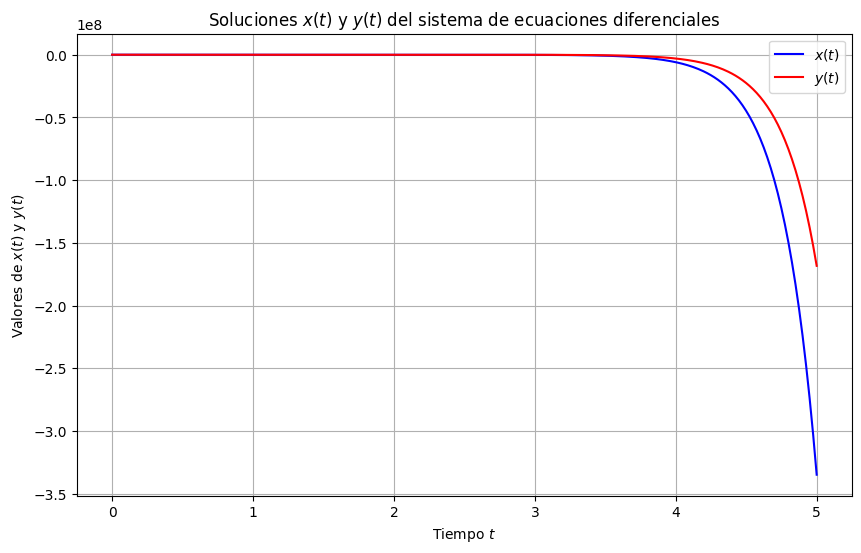

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convertimos las soluciones simbólicas a funciones de Python para evaluarlas numéricamente
x_t_func = sp.lambdify(t, x_t_solution, 'numpy')
y_t_func = sp.lambdify(t, y_t_solution, 'numpy')

# Creamos un rango de valores de t para la gráfica
t_values = np.linspace(0, 5, 400)  # De 0 a 5 con 400 puntos

# Calculamos los valores de x(t) y y(t) en ese rango
x_values = x_t_func(t_values)
y_values = y_t_func(t_values)

# Configuramos la gráfica
plt.figure(figsize=(10, 6))
plt.plot(t_values, x_values, label='$x(t)$', color='blue')
plt.plot(t_values, y_values, label='$y(t)$', color='red')
plt.title("Soluciones $x(t)$ y $y(t)$ del sistema de ecuaciones diferenciales")
plt.xlabel("Tiempo $t$")
plt.ylabel("Valores de $x(t)$ y $y(t)$")
plt.legend()
plt.grid()
plt.show()

## Ejercicio 4
Desarrolle el código necesario para analizar la estabilidad para los siguientes valores de k 

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Definir la matriz A en función de k

k = sp.symbols('k')
A = sp.Matrix([[0, 1], [-1, -k]])

display(A)
print("Siendo la matriz A para, el procedimeinto para ir evaulando la estabilidad, consto de tomar valores intermedios para los casos que planteban intervalos") 
print("\n")
def matriz_A(k):
    return np.array([[0, 1], [-1, -k]])


# Calcular autovalores y analizar estabilidad
def analizar_estabilidad(k):
    A = matriz_A(k)
    autovalores = np.linalg.eigvals(A)
    print(f"Para k = {k}: Autovalores = {autovalores}")
    
    # Verificar estabilidad
    if np.all(np.real(autovalores) < 0):
        print("El sistema es estable.\n")
    elif np.any(np.real(autovalores) > 0):
        print("El sistema es inestable.\n")
    else:
        print("El sistema es marginalmente estable.\n")

# Lista de valores de k a analizar
valores_k = [3, 2, 1, 0, -1, -2, -3]

# Análisis de estabilidad para cada valor de k
for k in valores_k:
    analizar_estabilidad(k)



Matrix([
[ 0,  1],
[-1, -k]])

Siendo la matriz A para, el procedimeinto para ir evaulando la estabilidad, consto de tomar valores intermedios para los casos que planteban intervalos


Para k = 3: Autovalores = [-0.38196601 -2.61803399]
El sistema es estable.

Para k = 2: Autovalores = [-1. -1.]
El sistema es estable.

Para k = 1: Autovalores = [-0.5+0.8660254j -0.5-0.8660254j]
El sistema es estable.

Para k = 0: Autovalores = [0.+1.j 0.-1.j]
El sistema es marginalmente estable.

Para k = -1: Autovalores = [0.5+0.8660254j 0.5-0.8660254j]
El sistema es inestable.

Para k = -2: Autovalores = [1. 1.]
El sistema es inestable.

Para k = -3: Autovalores = [0.38196601 2.61803399]
El sistema es inestable.



## Ejercicio 5
Desarrolle el código necesario para evaluar la estabilidad a partir de la función de Lyapunov, 
visualizando los cálculos necesarios, del punto 2 de Estabilidad. Realice la gráfica 
correspondiente. 

Definición de la matriz M:


Matrix([
[a, b],
[b, c]])

Matriz A del sistema:


Matrix([
[ 0,  1],
[-4, -5]])

Cálculo de A^T * M y M * A:
A^T * M:


Matrix([
[   -4*b,    -4*c],
[a - 5*b, b - 5*c]])

M * A:


Matrix([
[-4*b, a - 5*b],
[-4*c, b - 5*c]])

Suma A^T * M + M * A:


Matrix([
[         -8*b, a - 5*b - 4*c],
[a - 5*b - 4*c,    2*b - 10*c]])

Matriz -I:


Matrix([
[-1,  0],
[ 0, -1]])

Ecuación de Lyapunov: A^T * M + M * A = -I


Eq(Matrix([
[         -8*b, a - 5*b - 4*c],
[a - 5*b - 4*c,    2*b - 10*c]]), Matrix([
[-1,  0],
[ 0, -1]]))

Sistema de ecuaciones resultante:


Eq(-8*b, -1)

Eq(a - 5*b - 4*c, 0)

Eq(a - 5*b - 4*c, 0)

Eq(2*b - 10*c, -1)

Soluciones para a, b y c:


{a: 9/8, b: 1/8, c: 1/8}

Matriz M que satisface la ecuación de Lyapunov:


Matrix([
[9/8, 1/8],
[1/8, 1/8]])

Autovalores de la matriz M:


5/8 - sqrt(17)/8

sqrt(17)/8 + 5/8

Conclusión sobre la estabilidad:
Todos los autovalores son positivos. La matriz M es definida positiva, y el sistema es estable.


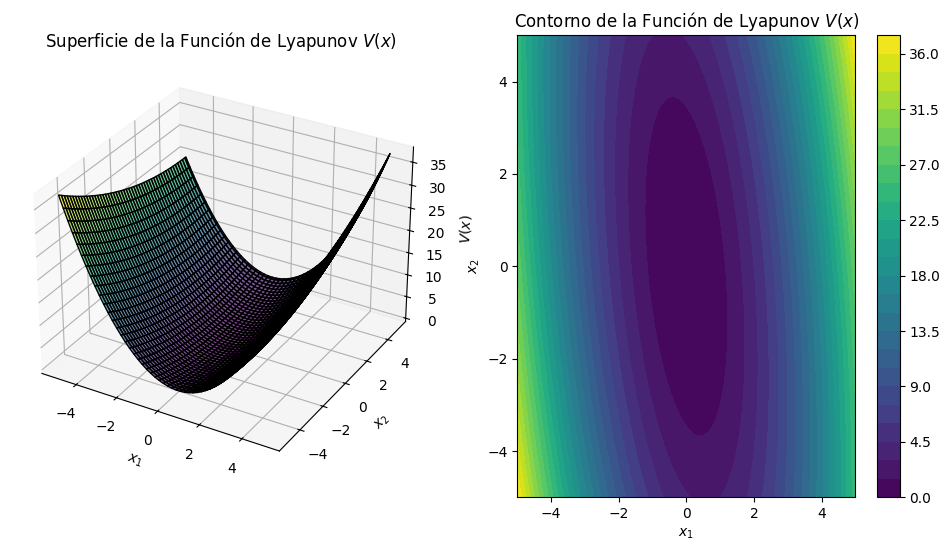

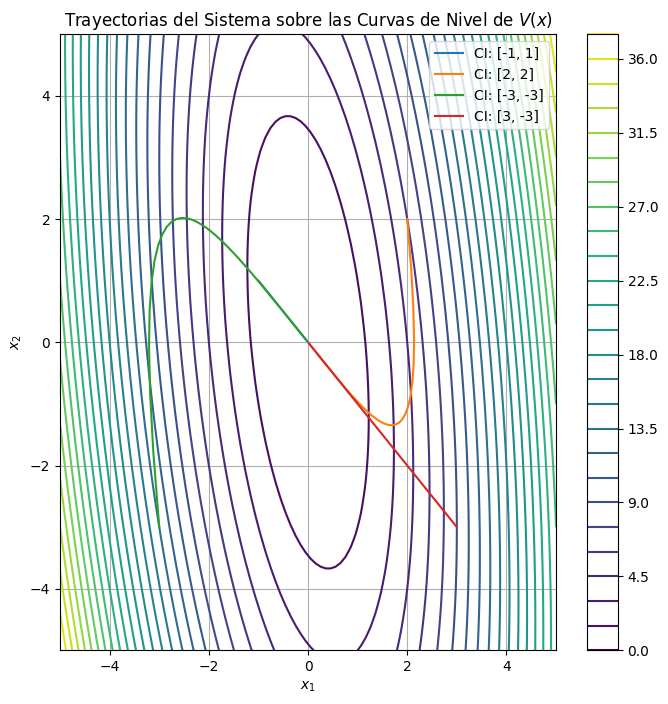

In [ ]:
import sympy as sp

# Paso 1: Definimos los símbolos para los elementos de la matriz M
a, b, c = sp.symbols('a b c')

# Paso 2: Definimos la matriz M como una matriz simétrica
M = sp.Matrix([[a, b], [b, c]])
print("Definición de la matriz M:")
display(M)

# Paso 3: Definimos la matriz A del sistema
A = sp.Matrix([[0, 1], [-4, -5]])
print("Matriz A del sistema:")
display(A)

# Paso 4: Calculamos A^T * M + M * A
AT_M = A.T * M
M_A = M * A
lyapunov_eq = AT_M + M_A

print("Cálculo de A^T * M y M * A:")
print("A^T * M:")
display(AT_M)
print("M * A:")
display(M_A)
print("Suma A^T * M + M * A:")
display(lyapunov_eq)

# Paso 5: Definimos la matriz -I (matriz identidad multiplicada por -1)
N = -sp.eye(2)
print("Matriz -I:")
display(N)

# Paso 6: Planteamos la ecuación de Lyapunov: A^T * M + M * A = -I
print("Ecuación de Lyapunov: A^T * M + M * A = -I")
lyapunov_eq_set = sp.Eq(lyapunov_eq, N)
display(lyapunov_eq_set)

# Paso 7: Extraemos las ecuaciones individuales de la igualdad y las resolvemos
eqs = [sp.Eq(lyapunov_eq[i, j], N[i, j]) for i in range(2) for j in range(2)]
print("Sistema de ecuaciones resultante:")
display(eqs[0])
display(eqs[1])
display(eqs[2])
display(eqs[3])


# Paso 8: Resolver el sistema de ecuaciones para obtener los valores de a, b, y c
solution = sp.solve(eqs, (a, b, c))
print("Soluciones para a, b y c:")
display(solution)

# Paso 9: Sustituimos los valores encontrados en M para obtener la matriz M específica que satisface la ecuación de Lyapunov
M_solution = M.subs(solution)
print("Matriz M que satisface la ecuación de Lyapunov:")
display(M_solution)

# Paso 10: Calculamos los autovalores de M para verificar si es definida positiva
eigenvalues = M_solution.eigenvals()
print("Autovalores de la matriz M:")
for eigenval in eigenvalues:
    display(eigenval)

# Paso 11: Interpretación de los autovalores para verificar la positividad y conclusión sobre la estabilidad
positive_definite = all(val > 0 for val in eigenvalues)
print("Conclusión sobre la estabilidad:")
if positive_definite:
    print("Todos los autovalores son positivos. La matriz M es definida positiva, y el sistema es estable.")
else:
    print("Hay autovalores no positivos. La matriz M no es definida positiva, y no podemos concluir estabilidad.")

# ---- Gráfica de la función de Lyapunov y las trayectorias ----

# función de Lyapunov V(x) = x^T M x en términos de x1 y x2
def V(x1, x2):
    M_np = np.array(M_solution).astype(np.float64)  # Convertir M a una matriz NumPy
    return np.einsum('ij,ij->i', np.einsum('ij,jk->ik', np.array([x1, x2]).T, M_np), np.array([x1, x2]).T)

# Crear un espacio de puntos para graficar
x1_vals = np.linspace(-5, 5, 100)
x2_vals = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
V_vals = V(X1.ravel(), X2.ravel()).reshape(X1.shape)

# Grafica de la superficie y el contorno de la función de Lyapunov
fig = plt.figure(figsize=(12, 6))

# Superficie 3D de V(x)
ax3d = fig.add_subplot(1, 2, 1, projection='3d')
ax3d.plot_surface(X1, X2, V_vals, cmap='viridis', edgecolor='k', alpha=0.7)
ax3d.set_title('Superficie de la Función de Lyapunov $V(x)$')
ax3d.set_xlabel('$x_1$')
ax3d.set_ylabel('$x_2$')
ax3d.set_zlabel('$V(x)$')

# Contorno de V(x) en 2D
ax2d = fig.add_subplot(1, 2, 2)
contour = ax2d.contourf(X1, X2, V_vals, levels=30, cmap='viridis')
plt.colorbar(contour)
ax2d.set_title('Contorno de la Función de Lyapunov $V(x)$')
ax2d.set_xlabel('$x_1$')
ax2d.set_ylabel('$x_2$')
plt.show()

# ---- Grafica de las trayectorias del sistema sobre el contorno de V(x) ----
def sistema(t, X):
    return A @ X

plt.figure(figsize=(8, 8))
contour = plt.contour(X1, X2, V_vals, levels=30, cmap='viridis')
plt.colorbar(contour)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Trayectorias del Sistema sobre las Curvas de Nivel de $V(x)$')

# Grafica de trayectorias con diferentes condiciones iniciales
condiciones_iniciales = [[-1, 1], [2, 2], [-3, -3], [3, -3]]
t_span = (0, 5)
t_eval = np.linspace(0, 5, 100)

for X0 in condiciones_iniciales:
    sol = solve_ivp(sistema, t_span, X0, t_eval=t_eval)
    plt.plot(sol.y[0], sol.y[1], label=f'CI: {X0}')

plt.legend()
plt.grid()
plt.show()
